100%|██████████| 26.4M/26.4M [00:01<00:00, 17.7MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.08MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 9.11MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch [1/2], Step [100/938], Loss: 0.6421


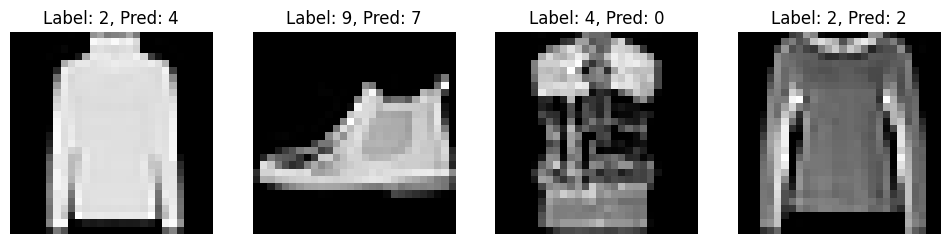

Epoch [1/2], Step [200/938], Loss: 0.4107


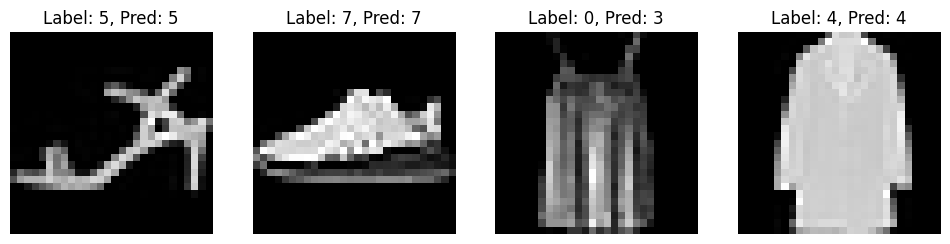

Epoch [1/2], Step [300/938], Loss: 0.7373


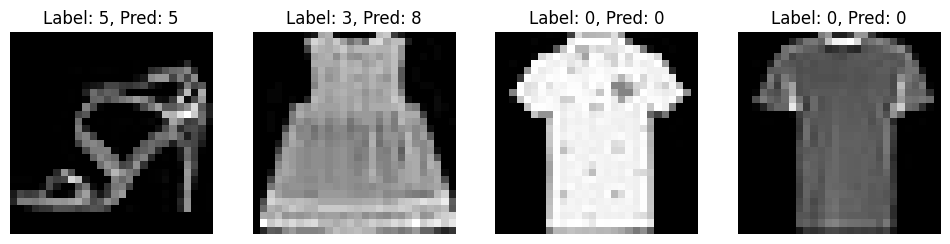

Epoch [1/2], Step [400/938], Loss: 0.5286


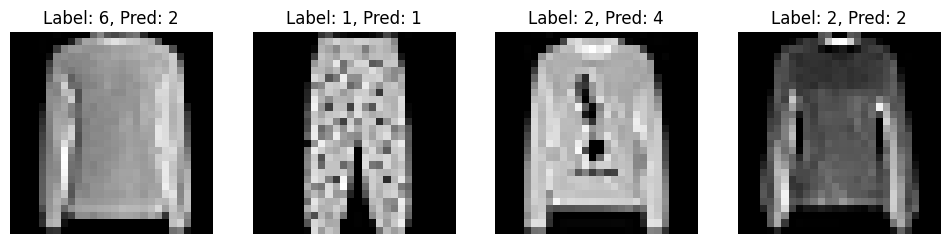

Epoch [1/2], Step [500/938], Loss: 0.5964


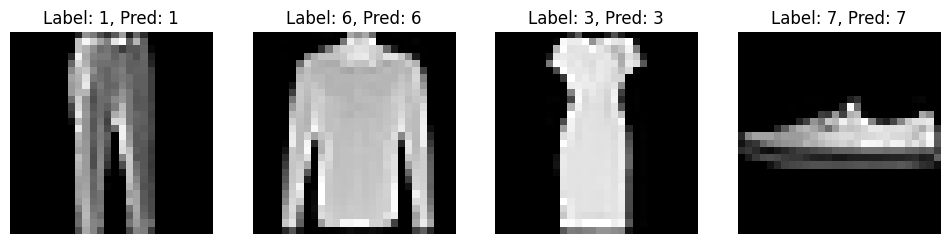

Epoch [1/2], Step [600/938], Loss: 0.2183


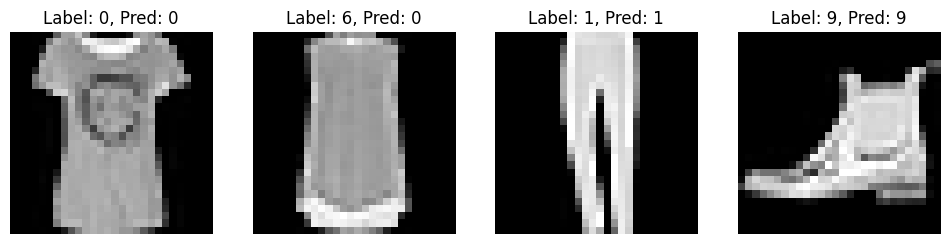

Epoch [1/2], Step [700/938], Loss: 0.3642


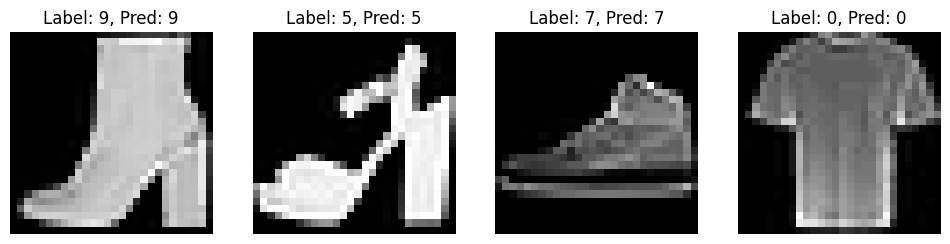

Epoch [1/2], Step [800/938], Loss: 0.3729


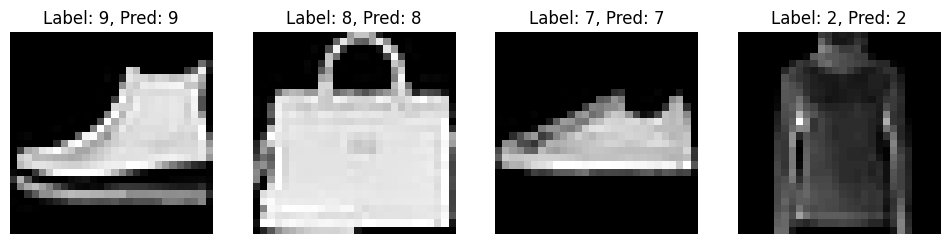

Epoch [1/2], Step [900/938], Loss: 0.2597


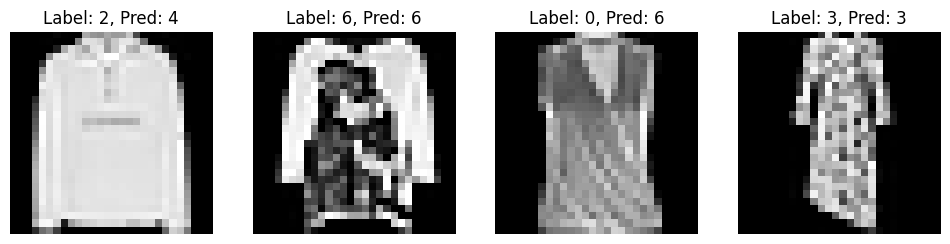

Epoch [2/2], Step [100/938], Loss: 0.2953


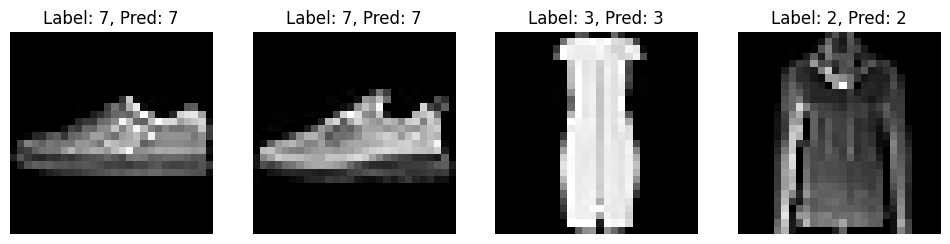

Epoch [2/2], Step [200/938], Loss: 0.2919


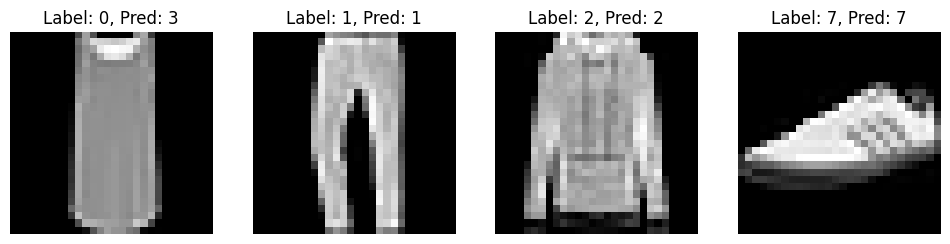

Epoch [2/2], Step [300/938], Loss: 0.4225


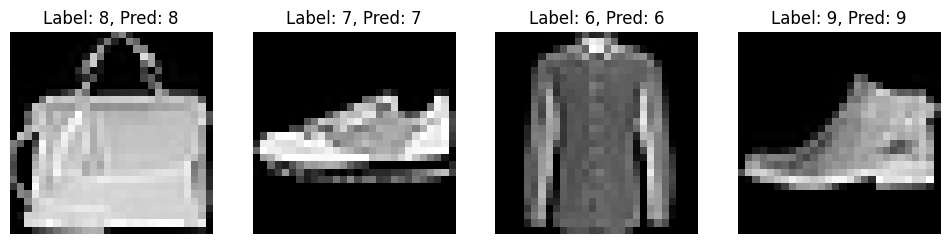

Epoch [2/2], Step [400/938], Loss: 0.2619


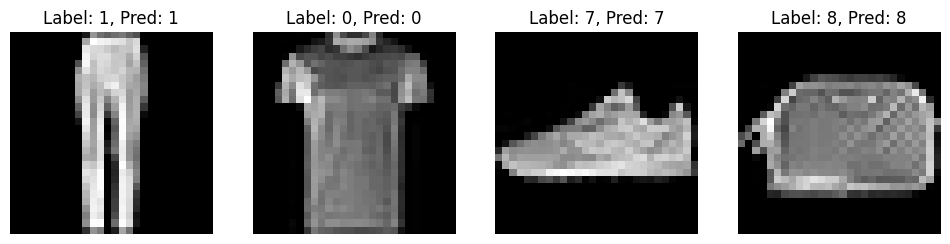

Epoch [2/2], Step [500/938], Loss: 0.2521


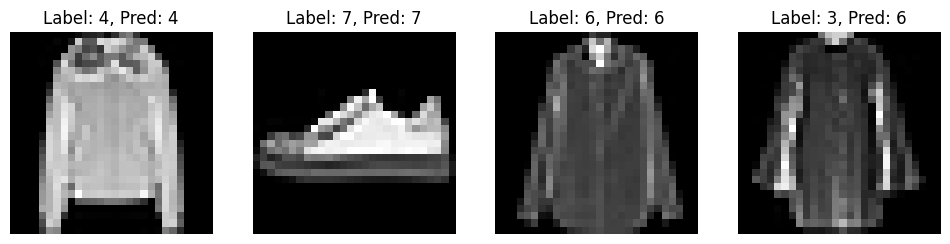

Epoch [2/2], Step [600/938], Loss: 0.1919


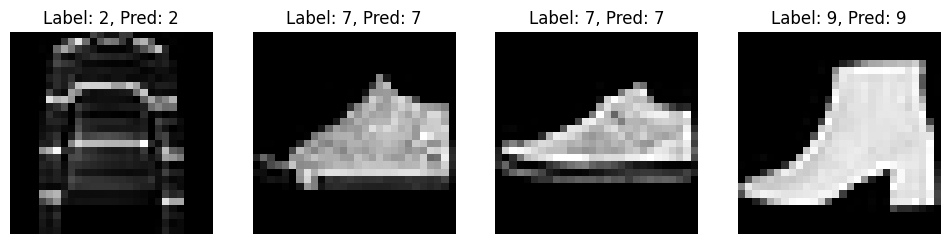

Epoch [2/2], Step [700/938], Loss: 0.1503


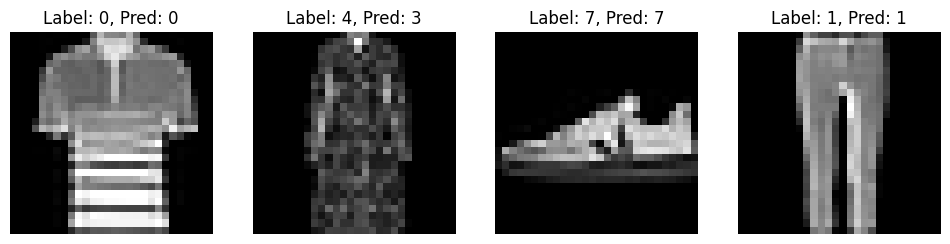

Epoch [2/2], Step [800/938], Loss: 0.4443


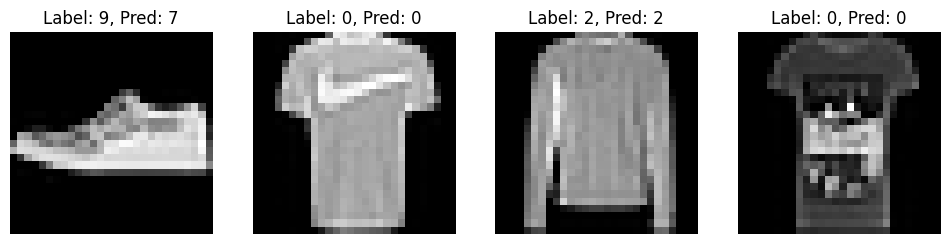

Epoch [2/2], Step [900/938], Loss: 0.3495


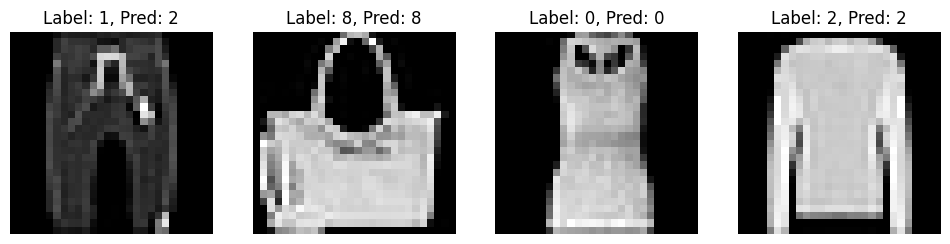

Test Accuracy: 90.08%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)

        return x

# Set random seed for reproducibility
torch.manual_seed(42)

# Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

            # Visualize some images
            sample_images = images[:4]  # Adjust the number of images to display
            sample_labels = labels[:4]
            sample_outputs = model(sample_images)

            plt.figure(figsize=(12, 3))
            for idx in range(sample_images.size(0)):
                plt.subplot(1, 4, idx + 1)
                img = sample_images[idx].numpy().squeeze()
                plt.imshow(img, cmap='gray')
                plt.title(f'Label: {sample_labels[idx]}, Pred: {torch.argmax(sample_outputs[idx])}')
                plt.axis('off')
            plt.show()

# Test the model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


epoch-2 layer -3
## New Section

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 170kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.14MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.85MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch [1/2], Step [100/938], Loss: 0.5861


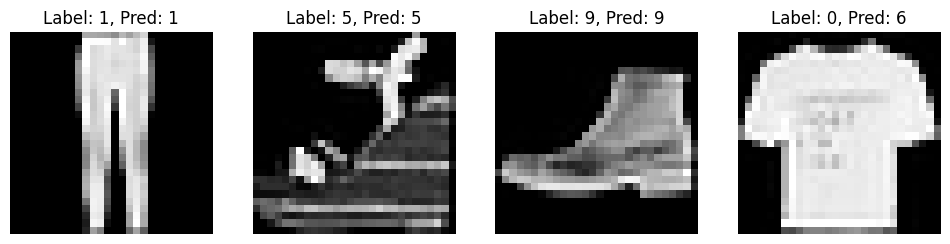

Epoch [1/2], Step [200/938], Loss: 0.6797


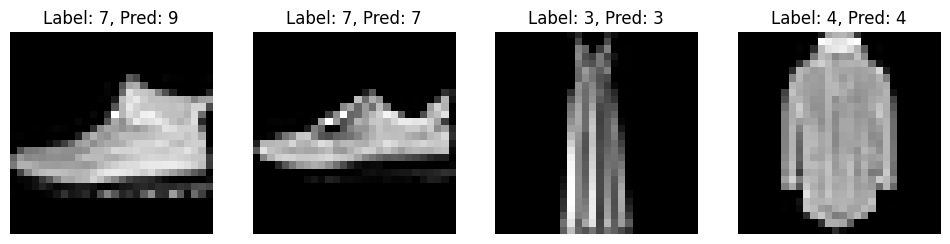

Epoch [1/2], Step [300/938], Loss: 0.4689


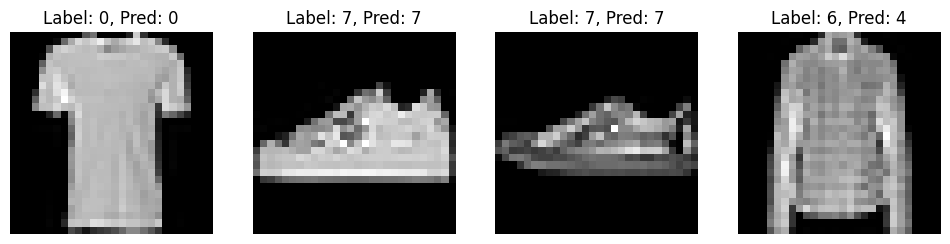

Epoch [1/2], Step [400/938], Loss: 0.4134


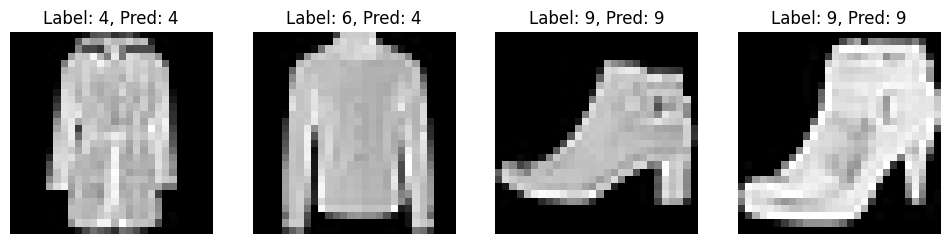

Epoch [1/2], Step [500/938], Loss: 0.5618


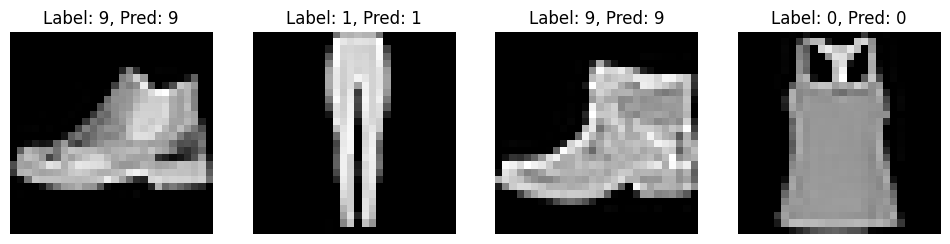

Epoch [1/2], Step [600/938], Loss: 0.2343


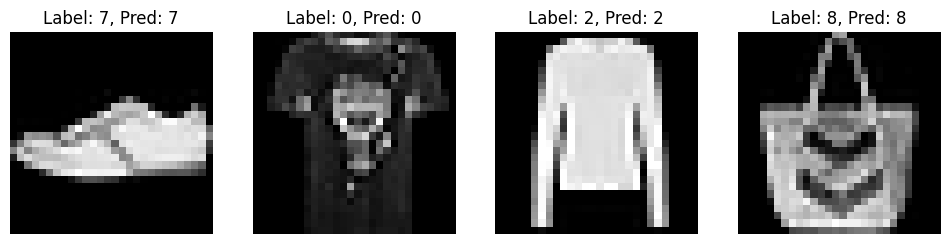

Epoch [1/2], Step [700/938], Loss: 0.2657


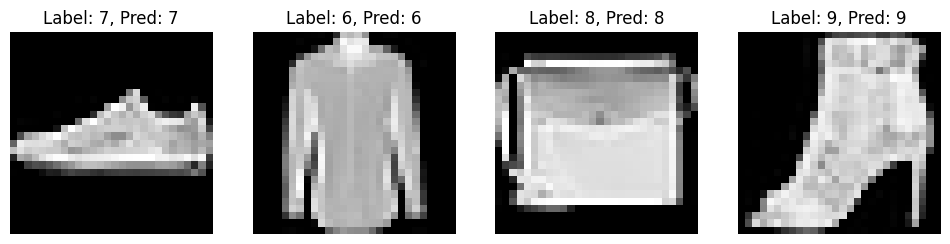

Epoch [1/2], Step [800/938], Loss: 0.1875


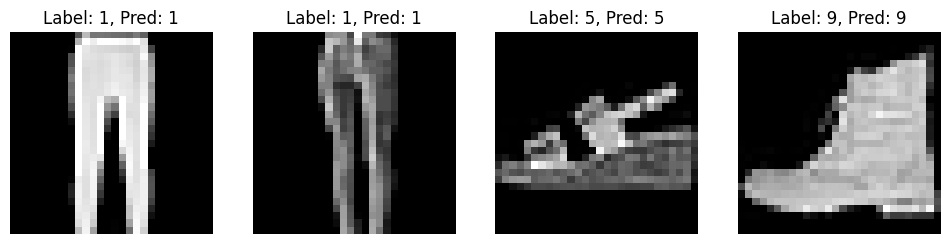

Epoch [1/2], Step [900/938], Loss: 0.3004


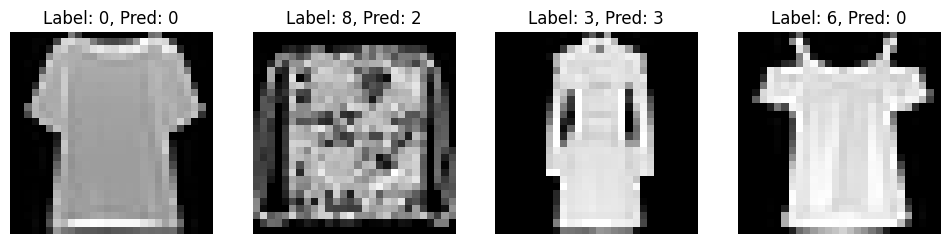

Epoch [2/2], Step [100/938], Loss: 0.3649


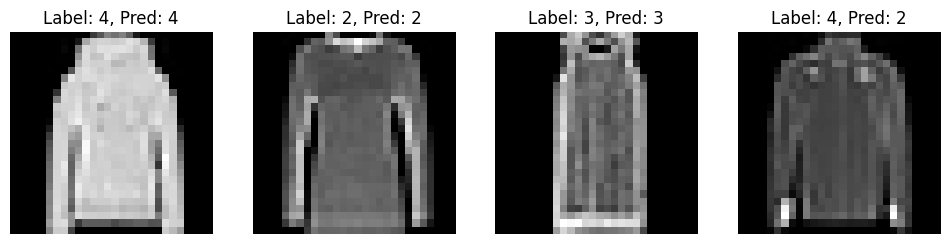

Epoch [2/2], Step [200/938], Loss: 0.2840


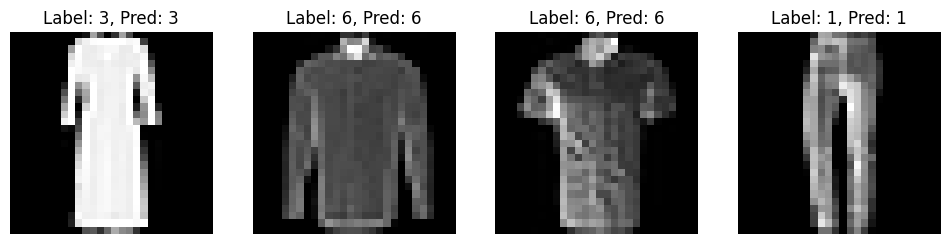

Epoch [2/2], Step [300/938], Loss: 0.2440


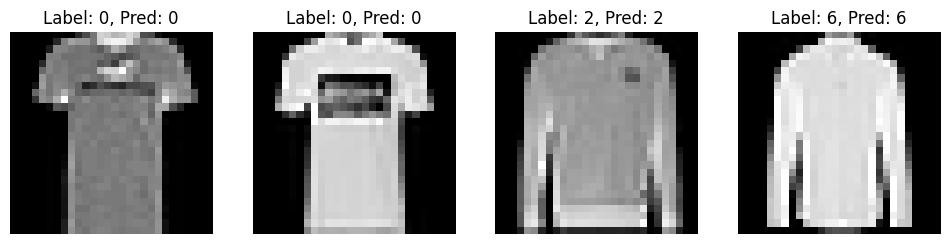

Epoch [2/2], Step [400/938], Loss: 0.2613


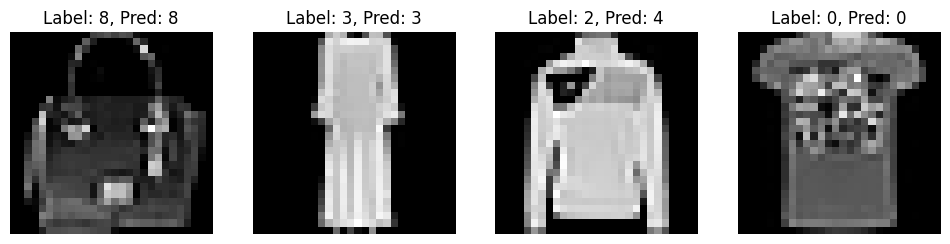

Epoch [2/2], Step [500/938], Loss: 0.1963


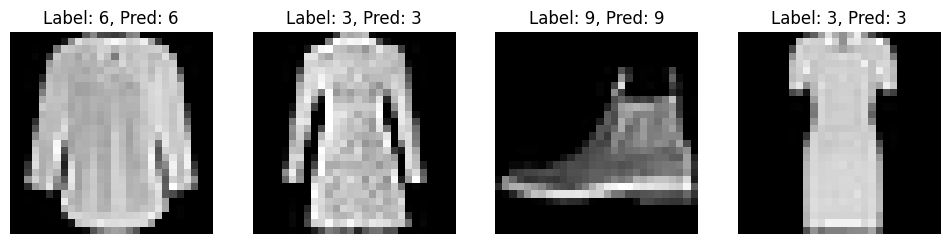

Epoch [2/2], Step [600/938], Loss: 0.5052


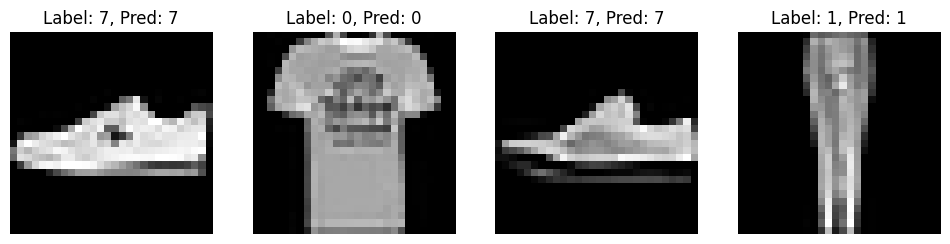

Epoch [2/2], Step [700/938], Loss: 0.2126


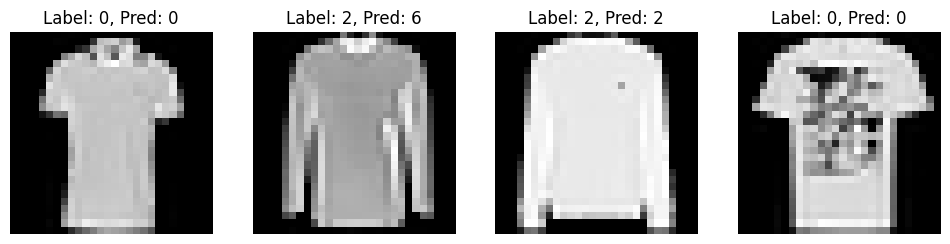

Epoch [2/2], Step [800/938], Loss: 0.0928


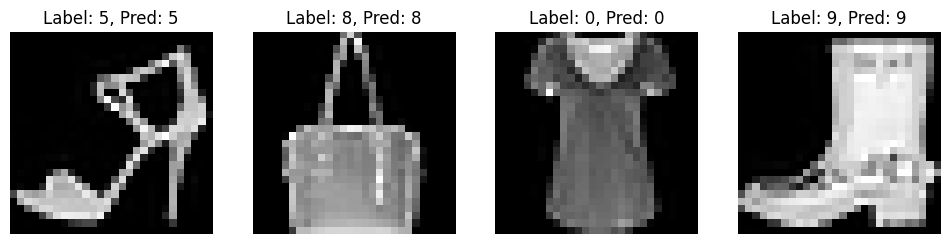

Epoch [2/2], Step [900/938], Loss: 0.2117


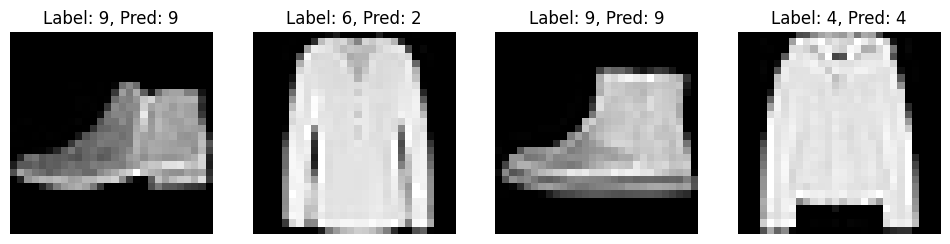

Test Accuracy: 89.17%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the CNN model with 3 convolutional layers
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)  # Added third convolutional layer
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 3 * 3, 128)  # Adjusted the input size for the fully connected layer
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)

        x = self.conv3(x)  # Third convolutional layer
        x = self.relu3(x)
        x = self.maxpool3(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)

        return x

# Set random seed for reproducibility
torch.manual_seed(42)

# Load Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

            # Visualize some images
            sample_images = images[:4]  # Adjust the number of images to display
            sample_labels = labels[:4]
            sample_outputs = model(sample_images)

            plt.figure(figsize=(12, 3))
            for idx in range(sample_images.size(0)):
                plt.subplot(1, 4, idx + 1)
                img = sample_images[idx].numpy().squeeze()
                plt.imshow(img, cmap='gray')
                plt.title(f'Label: {sample_labels[idx]}, Pred: {torch.argmax(sample_outputs[idx])}')
                plt.axis('off')
            plt.show()

# Test the model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch [1/4], Step [100/938], Loss: 0.1628


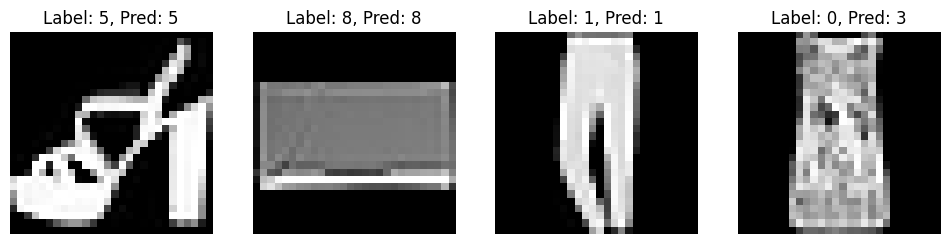

Epoch [1/4], Step [200/938], Loss: 0.4228


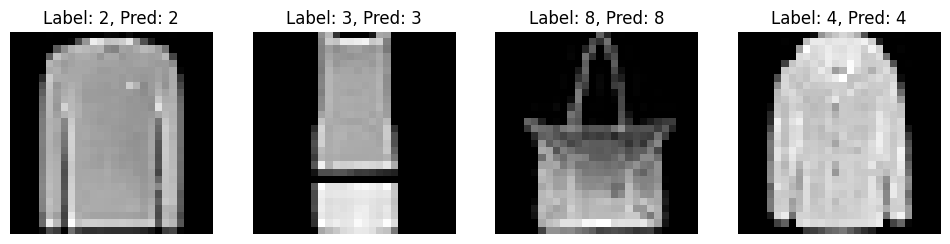

Epoch [1/4], Step [300/938], Loss: 0.2411


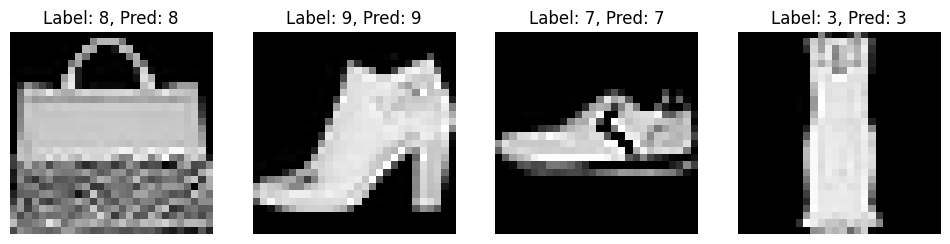

Epoch [1/4], Step [400/938], Loss: 0.2445


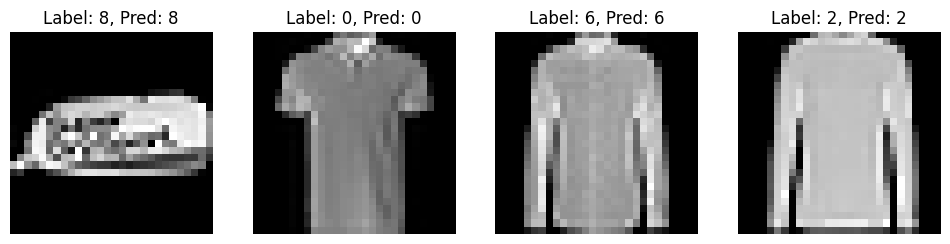

Epoch [1/4], Step [500/938], Loss: 0.2803


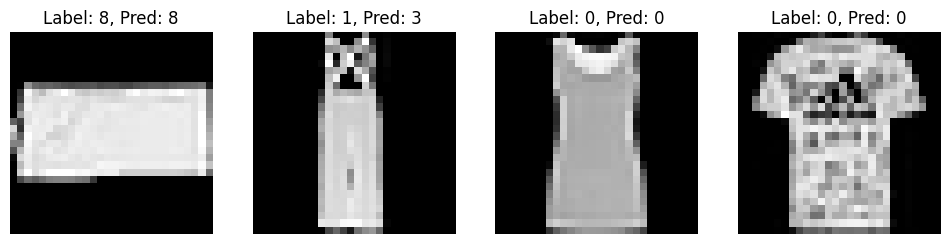

Epoch [1/4], Step [600/938], Loss: 0.2637


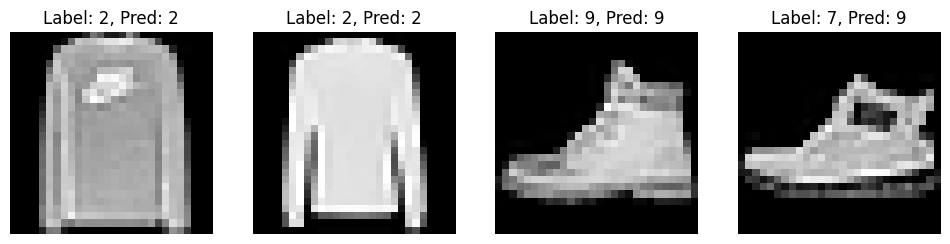

Epoch [1/4], Step [700/938], Loss: 0.2863


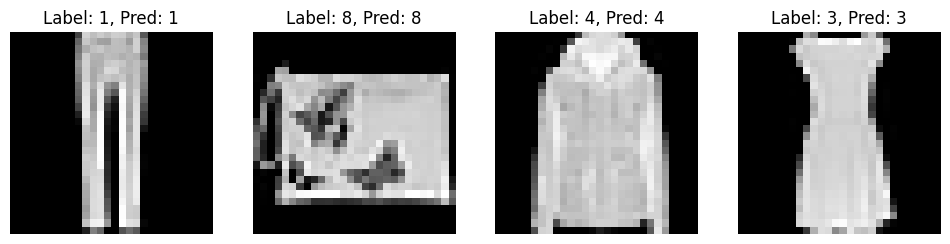

Epoch [1/4], Step [800/938], Loss: 0.3242


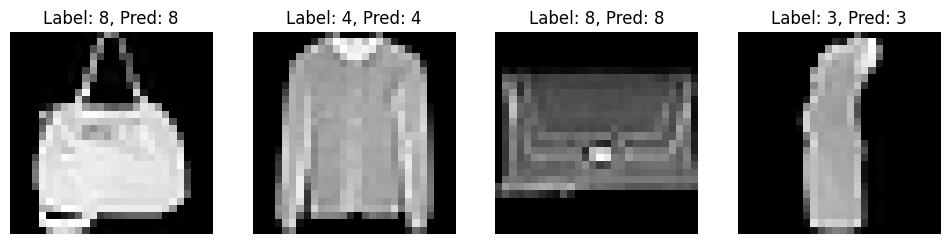

Epoch [1/4], Step [900/938], Loss: 0.2099


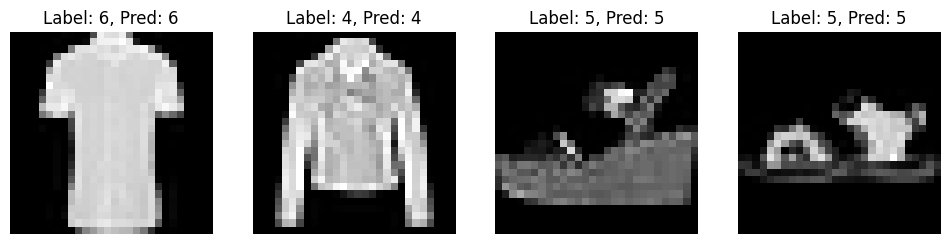

Epoch [2/4], Step [100/938], Loss: 0.3408


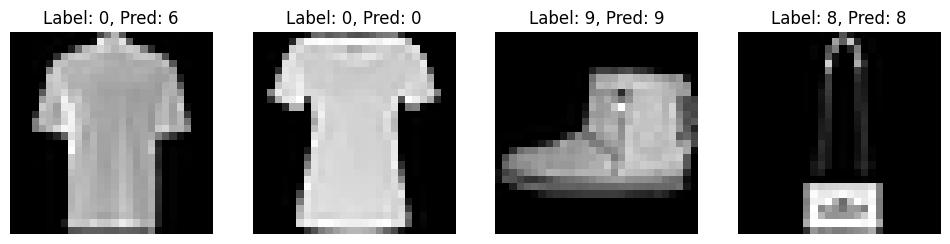

Epoch [2/4], Step [200/938], Loss: 0.1700


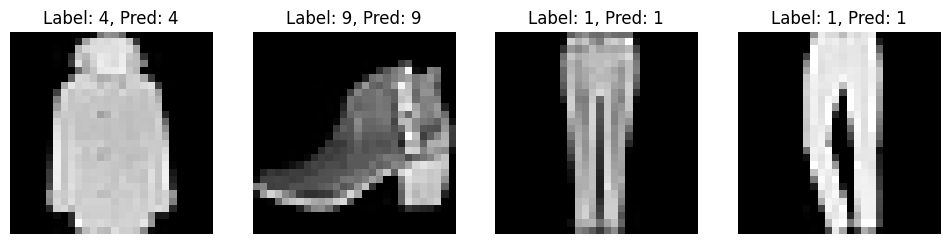

Epoch [2/4], Step [300/938], Loss: 0.3595


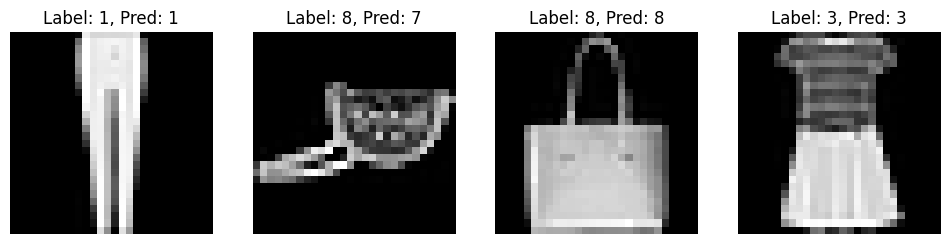

Epoch [2/4], Step [400/938], Loss: 0.1561


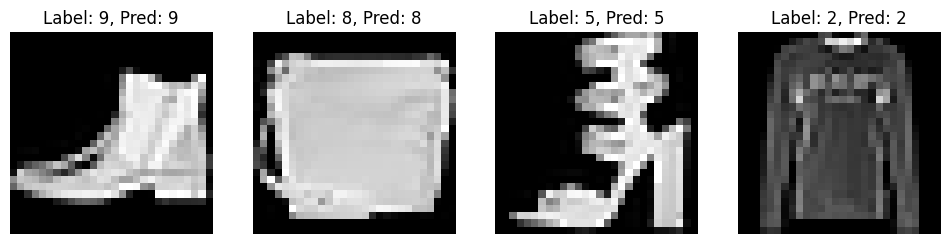

Epoch [2/4], Step [500/938], Loss: 0.1849


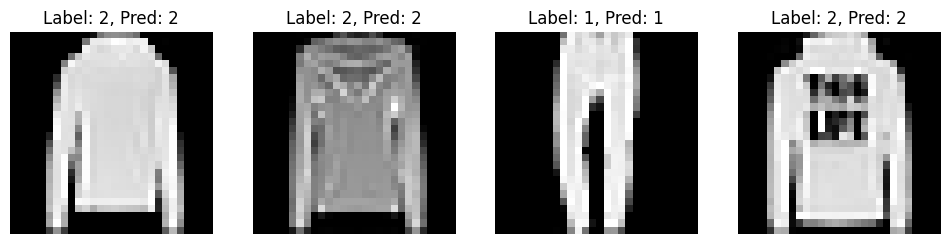

Epoch [2/4], Step [600/938], Loss: 0.3182


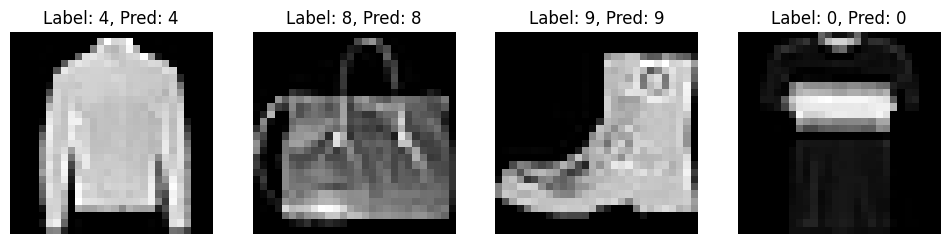

Epoch [2/4], Step [700/938], Loss: 0.2113


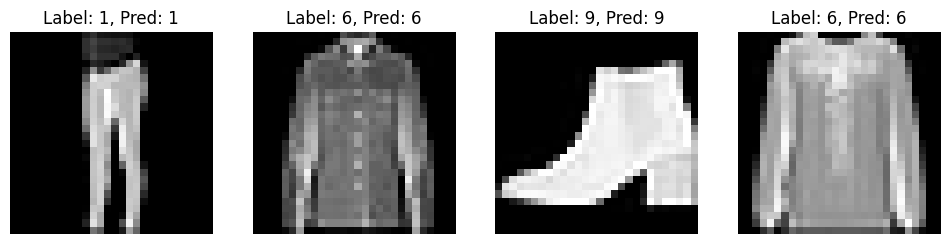

Epoch [2/4], Step [800/938], Loss: 0.2283


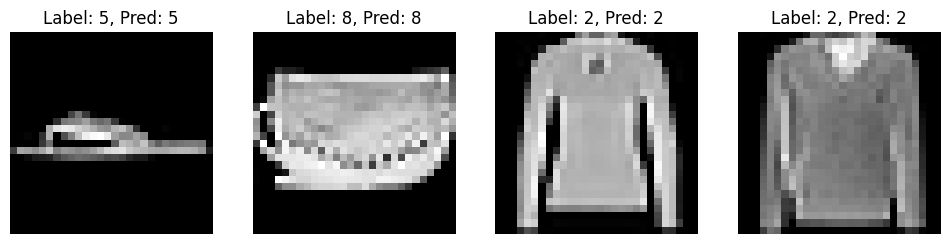

Epoch [2/4], Step [900/938], Loss: 0.2848


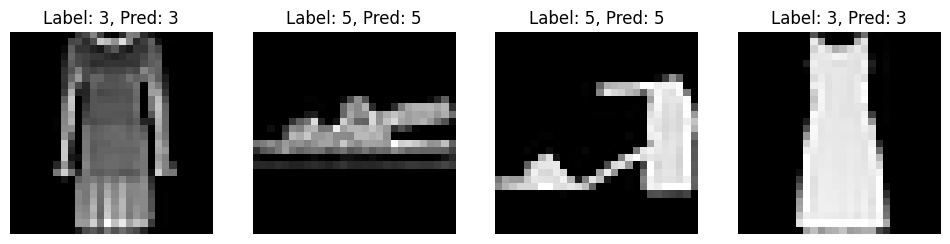

Epoch [3/4], Step [100/938], Loss: 0.1040


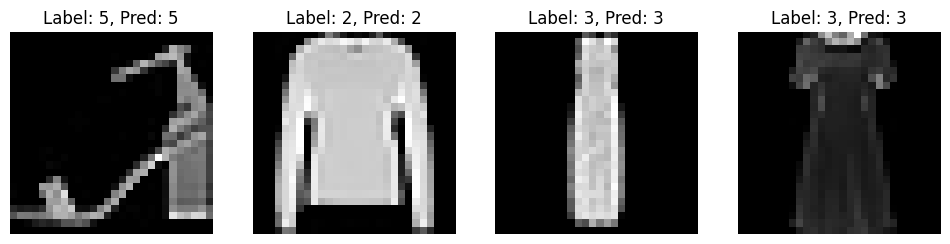

Epoch [3/4], Step [200/938], Loss: 0.1441


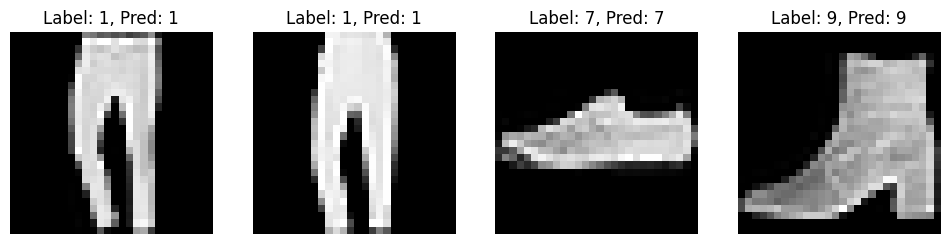

Epoch [3/4], Step [300/938], Loss: 0.1741


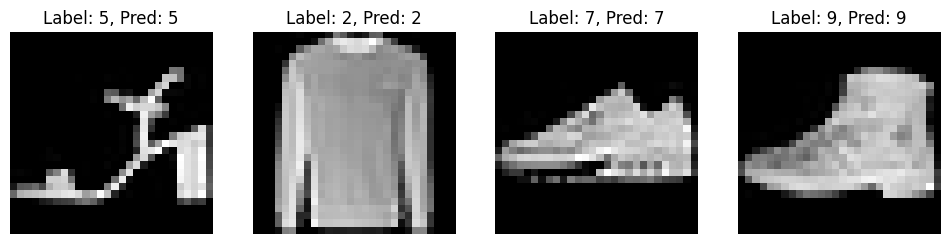

Epoch [3/4], Step [400/938], Loss: 0.1685


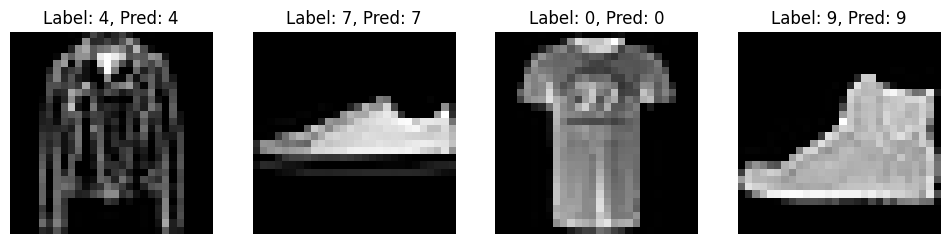

Epoch [3/4], Step [500/938], Loss: 0.2139


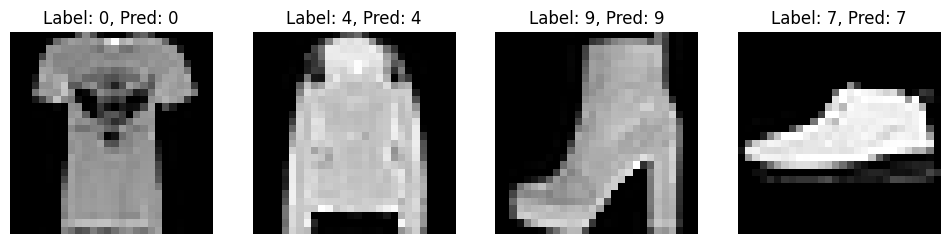

Epoch [3/4], Step [600/938], Loss: 0.3163


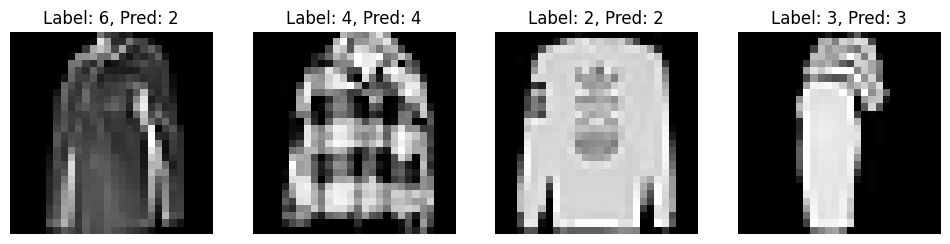

Epoch [3/4], Step [700/938], Loss: 0.2057


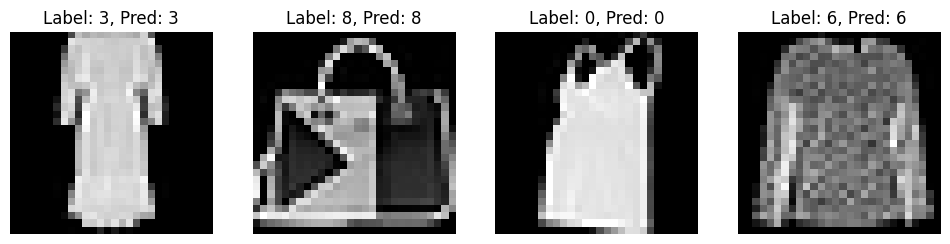

Epoch [3/4], Step [800/938], Loss: 0.1667


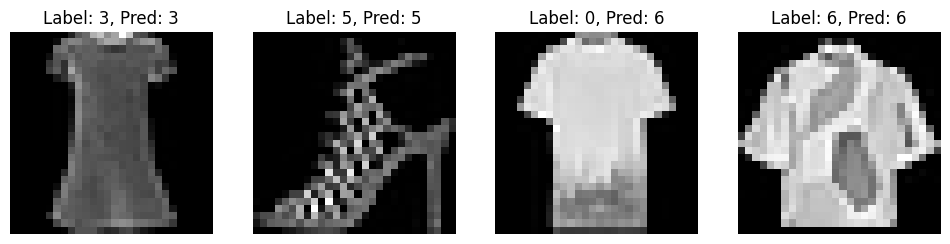

Epoch [3/4], Step [900/938], Loss: 0.1947


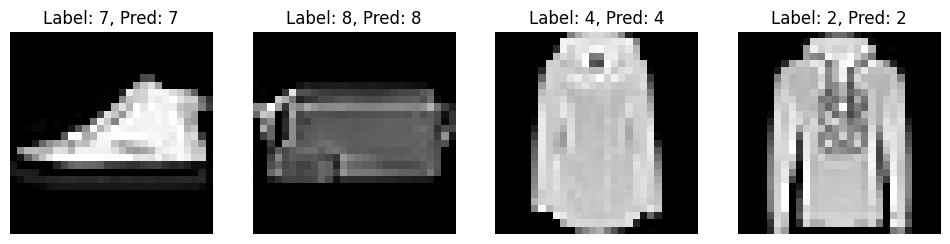

Epoch [4/4], Step [100/938], Loss: 0.2109


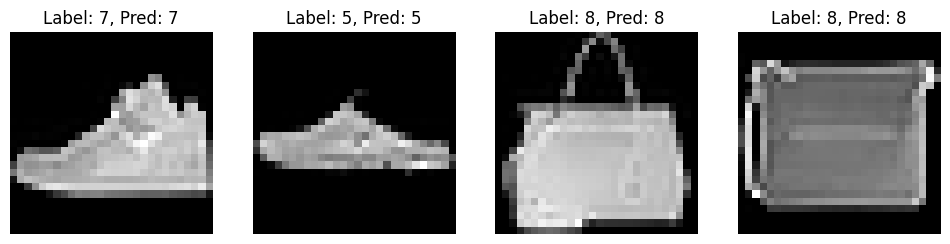

Epoch [4/4], Step [200/938], Loss: 0.1667


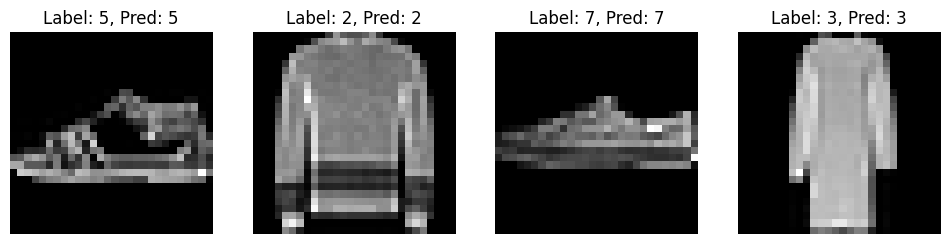

Epoch [4/4], Step [300/938], Loss: 0.2227


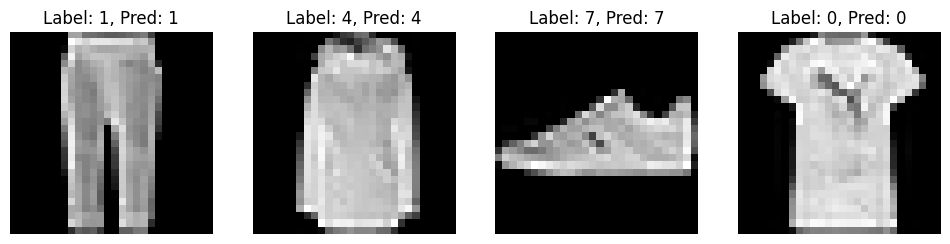

Epoch [4/4], Step [400/938], Loss: 0.1530


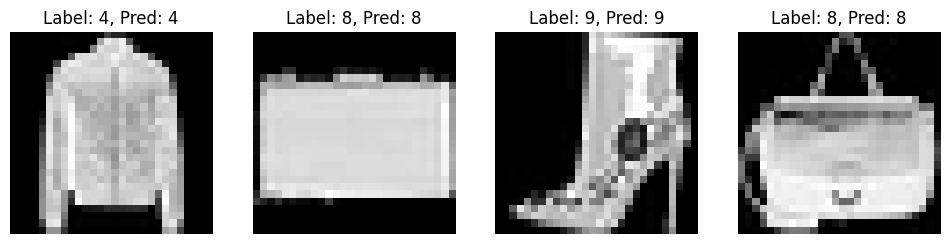

Epoch [4/4], Step [500/938], Loss: 0.2087


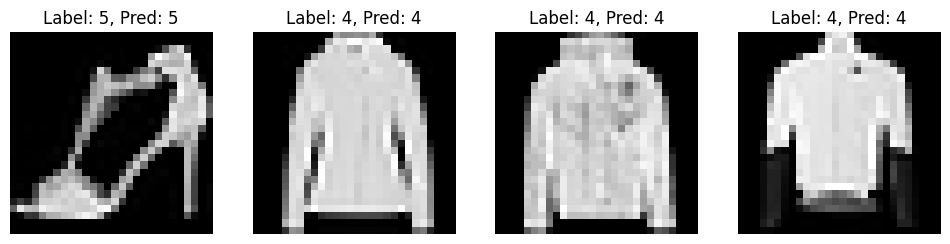

Epoch [4/4], Step [600/938], Loss: 0.1770


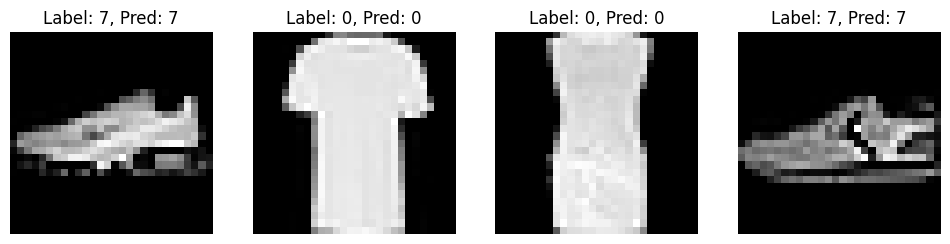

Epoch [4/4], Step [700/938], Loss: 0.1664


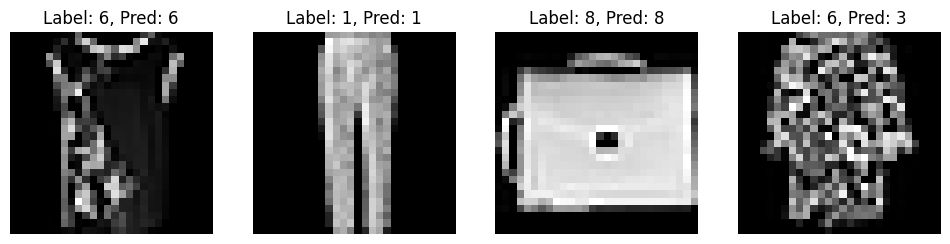

Epoch [4/4], Step [800/938], Loss: 0.0525


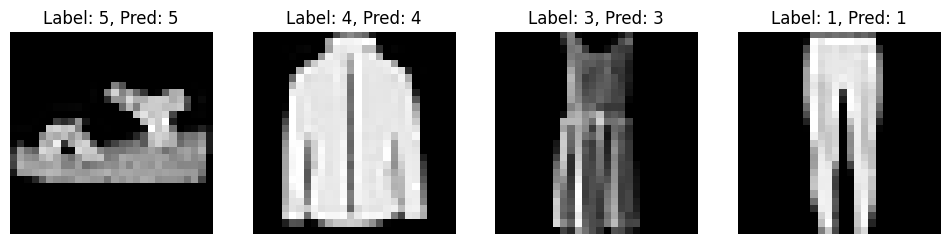

Epoch [4/4], Step [900/938], Loss: 0.1783


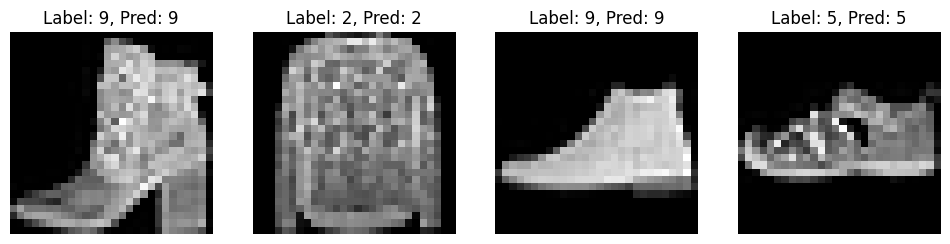

Test Accuracy: 91.42%


In [ ]:
# Training loop
num_epochs = 4
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

            # Visualize some images
            sample_images = images[:4]  # Adjust the number of images to display
            sample_labels = labels[:4]
            sample_outputs = model(sample_images)

            plt.figure(figsize=(12, 3))
            for idx in range(sample_images.size(0)):
                plt.subplot(1, 4, idx + 1)
                img = sample_images[idx].numpy().squeeze()
                plt.imshow(img, cmap='gray')
                plt.title(f'Label: {sample_labels[idx]}, Pred: {torch.argmax(sample_outputs[idx])}')
                plt.axis('off')
            plt.show()

# Test the model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch [1/6], Step [100/938], Loss: 0.1135


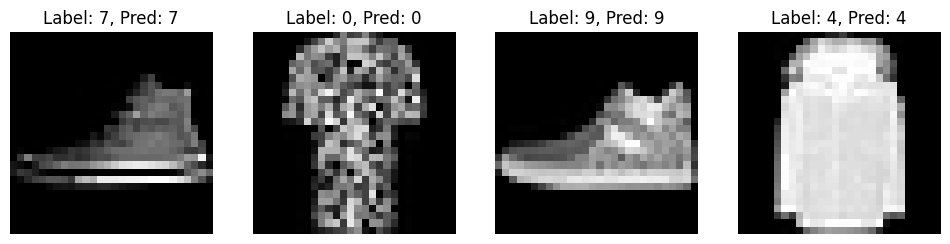

Epoch [1/6], Step [200/938], Loss: 0.2046


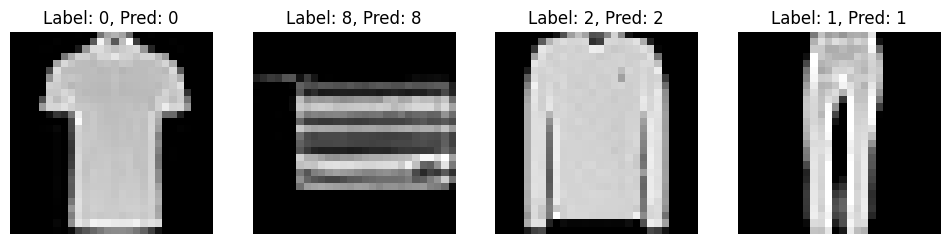

Epoch [1/6], Step [300/938], Loss: 0.2514


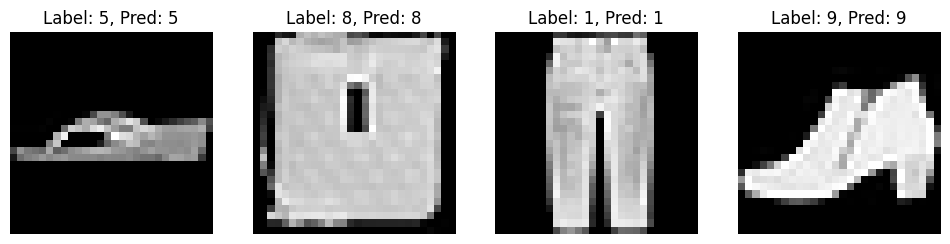

Epoch [1/6], Step [400/938], Loss: 0.2240


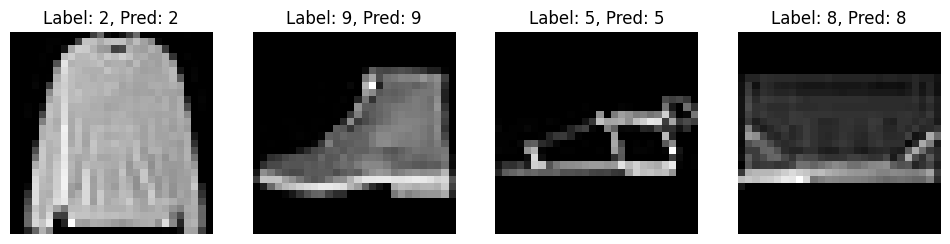

Epoch [1/6], Step [500/938], Loss: 0.1993


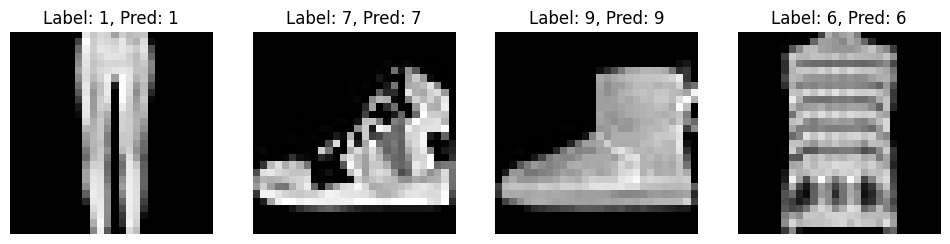

Epoch [1/6], Step [600/938], Loss: 0.0564


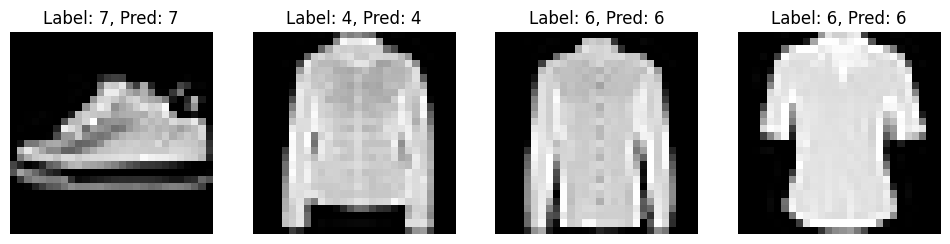

Epoch [1/6], Step [700/938], Loss: 0.3238


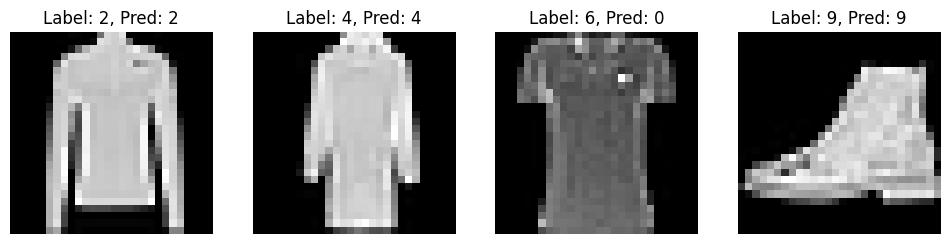

Epoch [1/6], Step [800/938], Loss: 0.2257


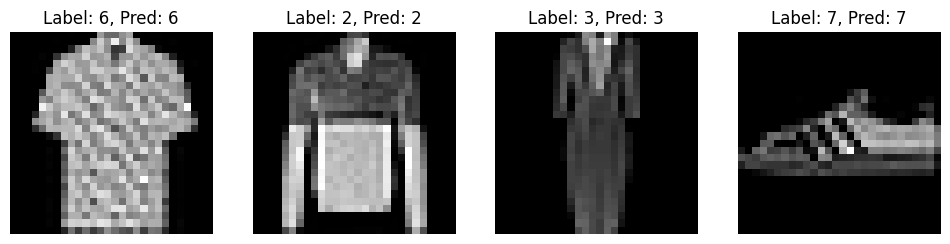

Epoch [1/6], Step [900/938], Loss: 0.1330


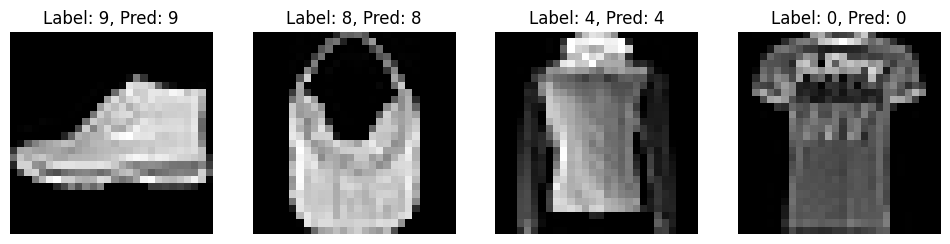

Epoch [2/6], Step [100/938], Loss: 0.1308


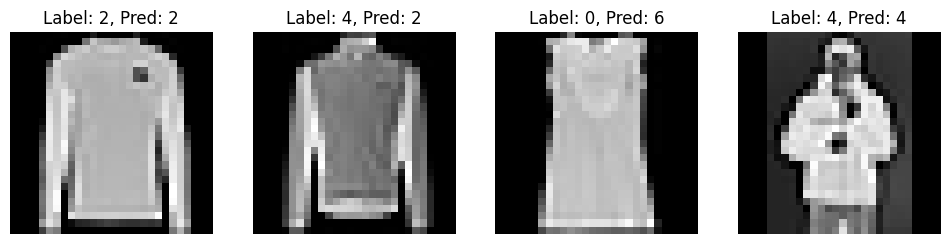

Epoch [2/6], Step [200/938], Loss: 0.1290


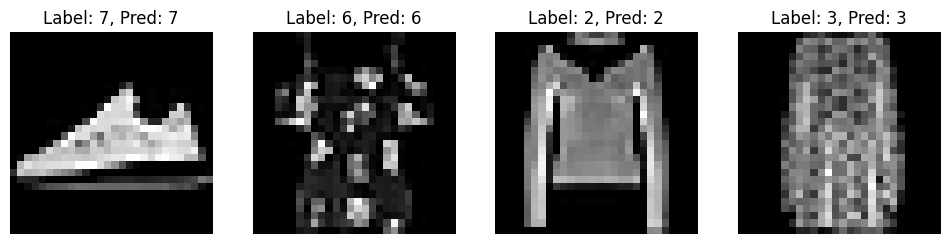

Epoch [2/6], Step [300/938], Loss: 0.0243


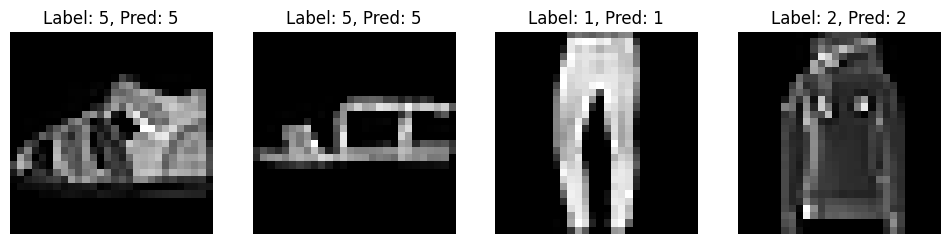

Epoch [2/6], Step [400/938], Loss: 0.0872


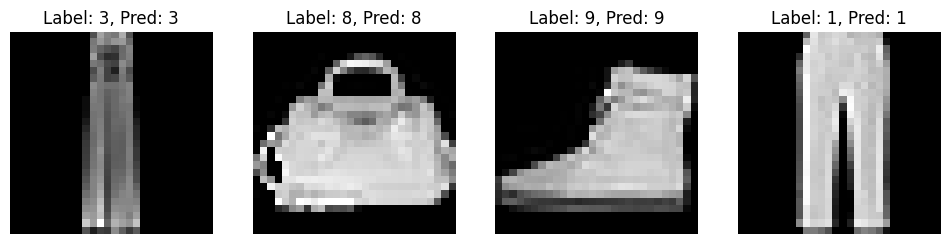

Epoch [2/6], Step [500/938], Loss: 0.0289


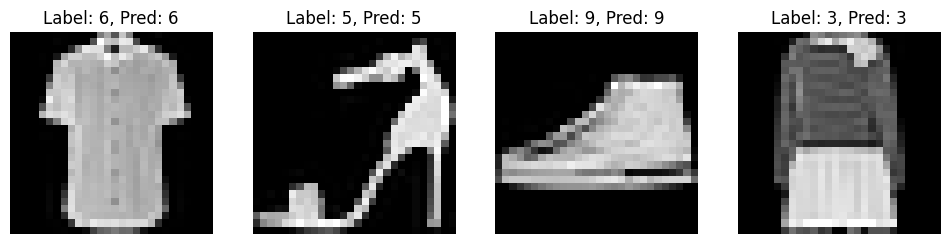

Epoch [2/6], Step [600/938], Loss: 0.0745


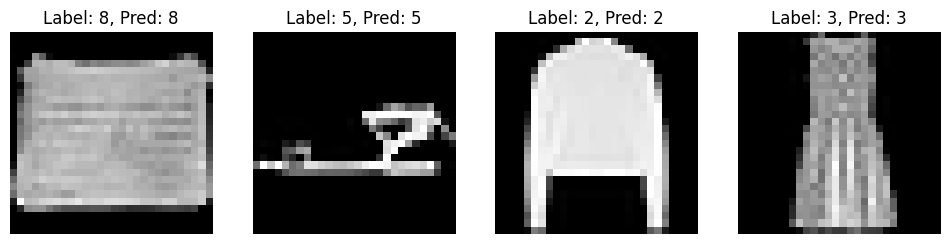

Epoch [2/6], Step [700/938], Loss: 0.0871


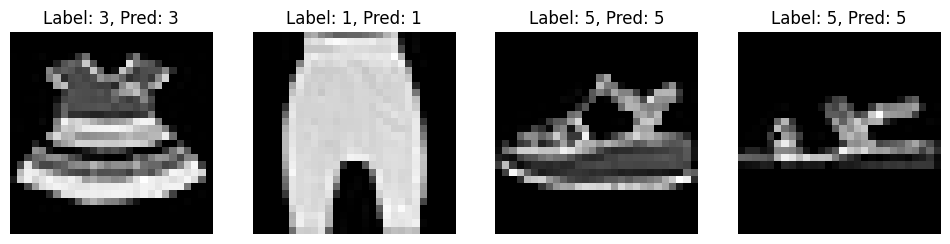

Epoch [2/6], Step [800/938], Loss: 0.0638


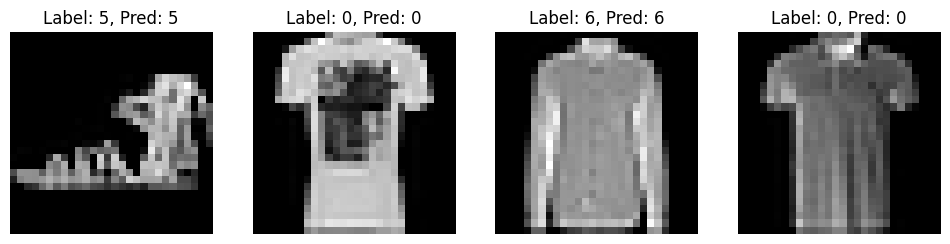

Epoch [2/6], Step [900/938], Loss: 0.0774


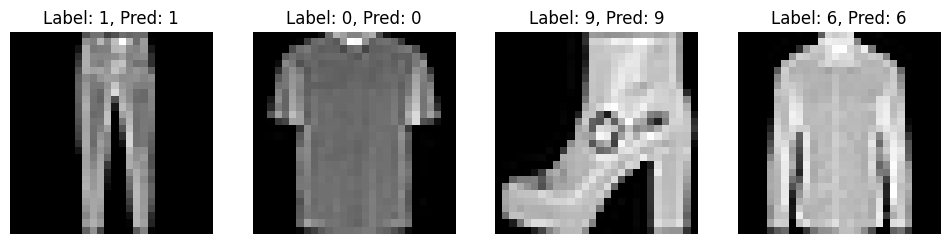

Epoch [3/6], Step [100/938], Loss: 0.0516


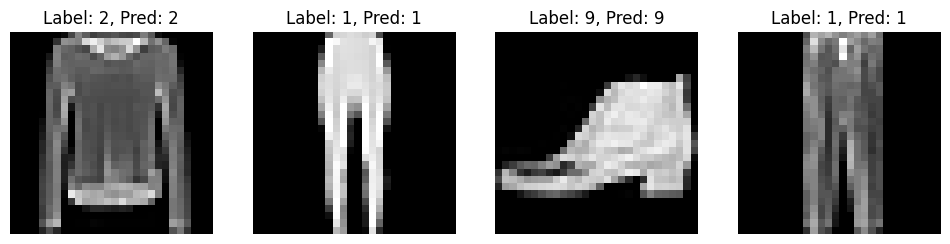

Epoch [3/6], Step [200/938], Loss: 0.0875


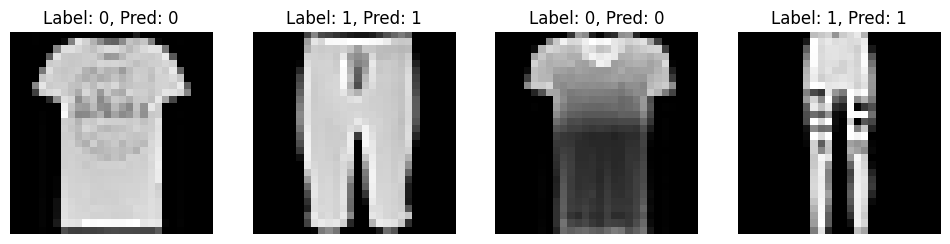

Epoch [3/6], Step [300/938], Loss: 0.1338


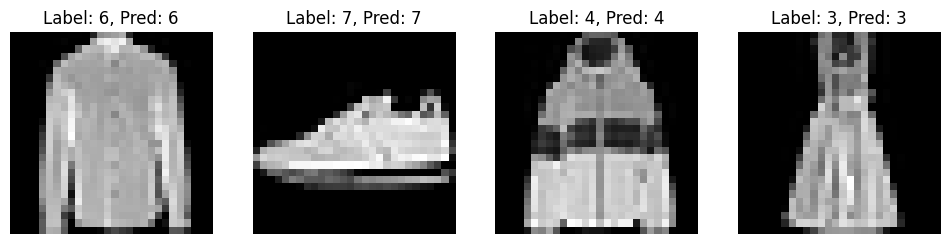

Epoch [3/6], Step [400/938], Loss: 0.2102


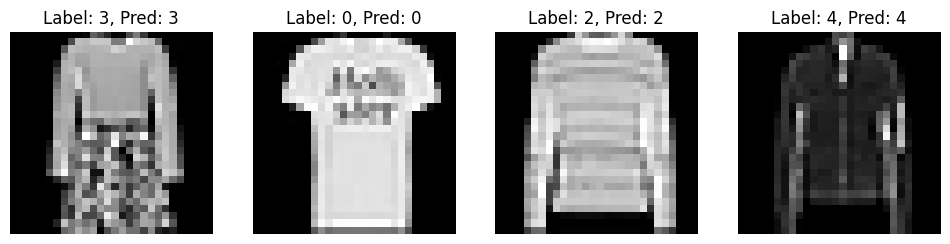

Epoch [3/6], Step [500/938], Loss: 0.1053


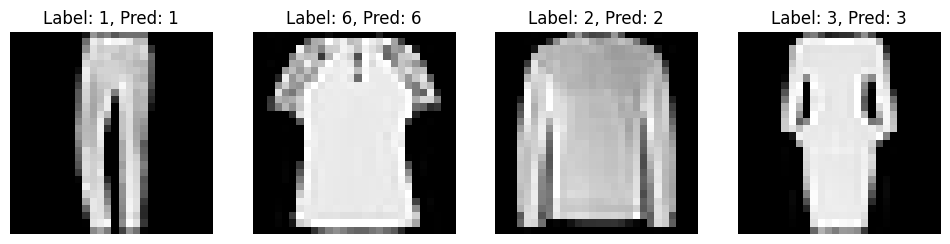

Epoch [3/6], Step [600/938], Loss: 0.1890


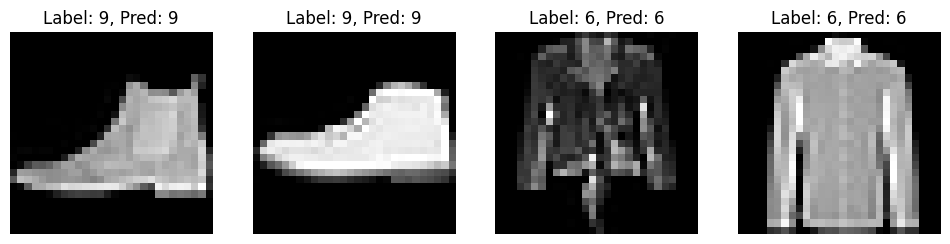

Epoch [3/6], Step [700/938], Loss: 0.1044


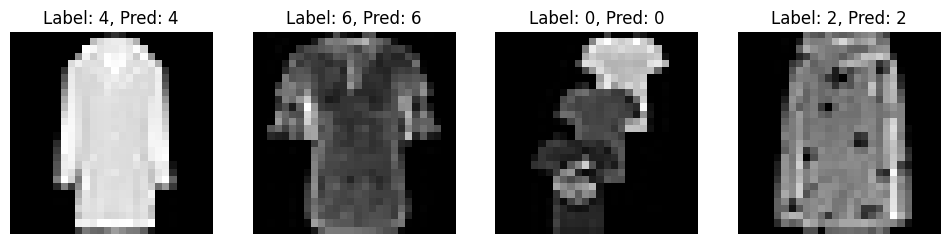

Epoch [3/6], Step [800/938], Loss: 0.0801


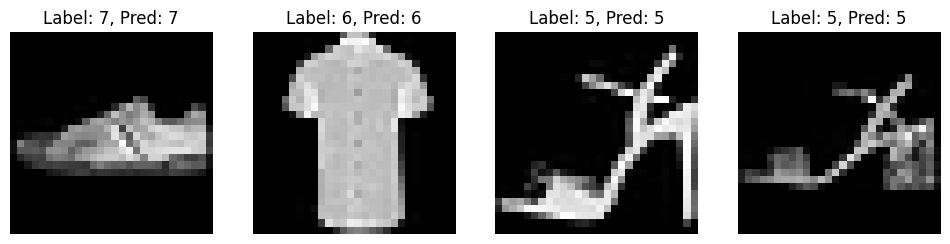

Epoch [3/6], Step [900/938], Loss: 0.1355


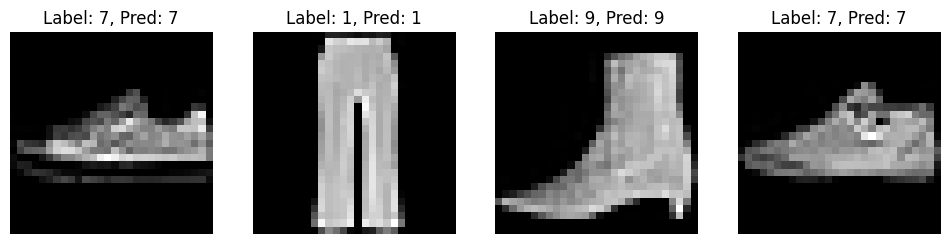

Epoch [4/6], Step [100/938], Loss: 0.0840


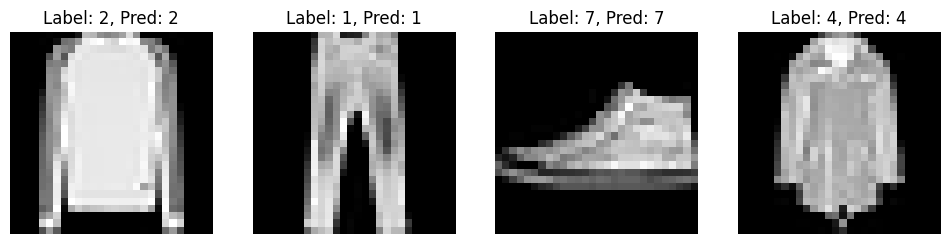

Epoch [4/6], Step [200/938], Loss: 0.0529


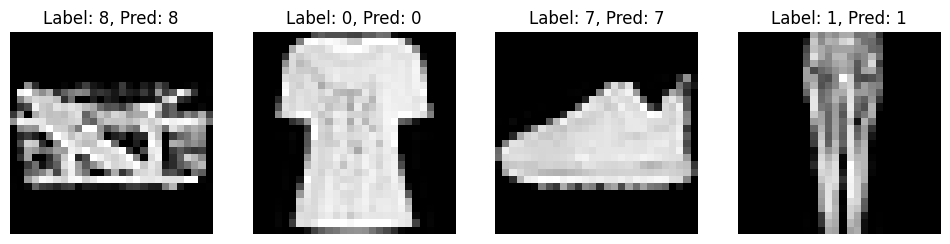

Epoch [4/6], Step [300/938], Loss: 0.0837


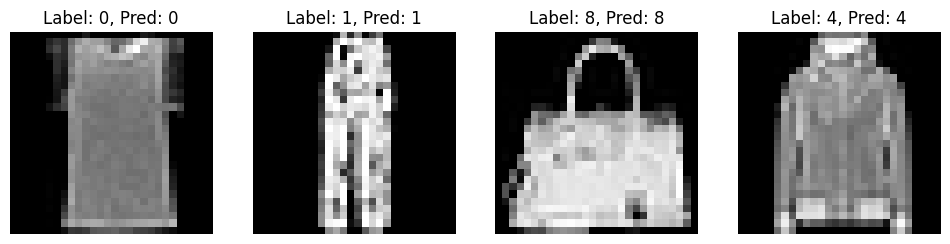

Epoch [4/6], Step [400/938], Loss: 0.1135


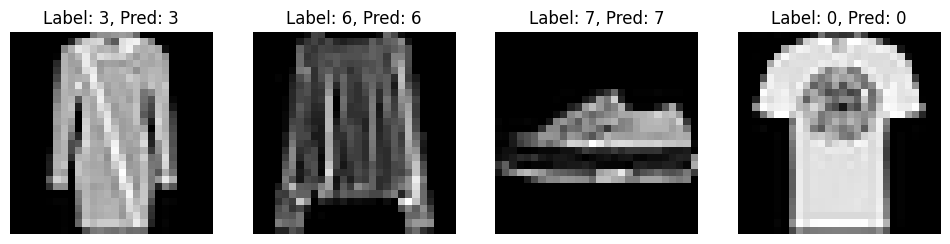

Epoch [4/6], Step [500/938], Loss: 0.1356


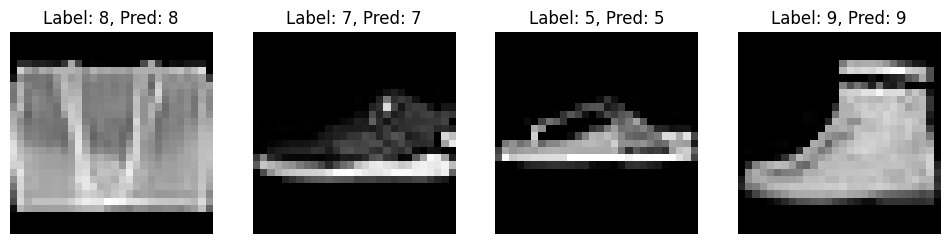

Epoch [4/6], Step [600/938], Loss: 0.1039


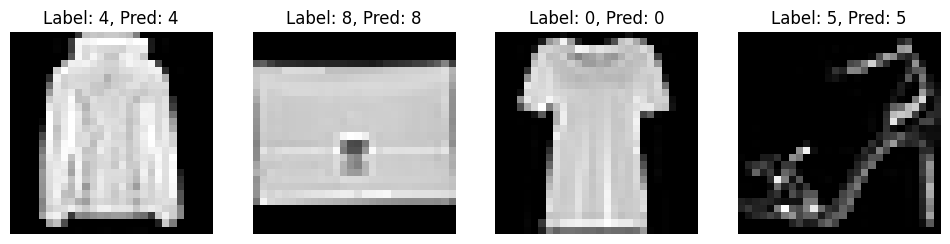

Epoch [4/6], Step [700/938], Loss: 0.0615


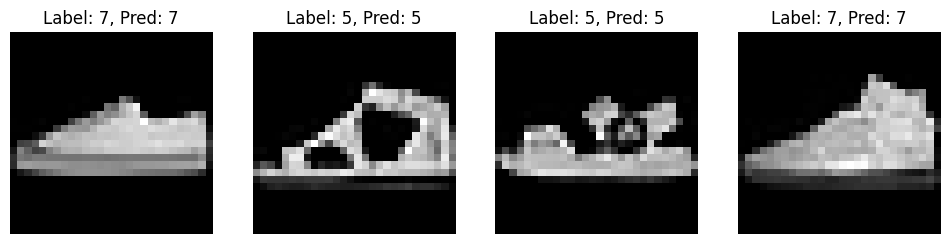

Epoch [4/6], Step [800/938], Loss: 0.0619


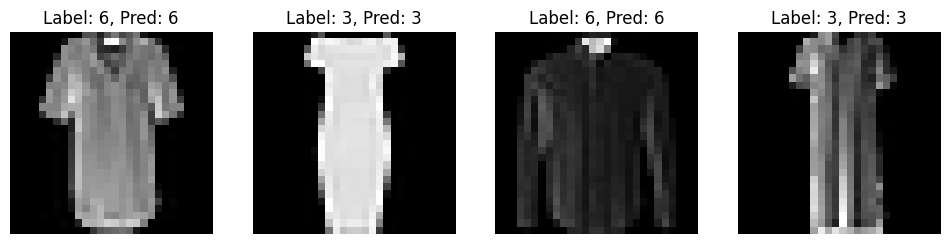

Epoch [4/6], Step [900/938], Loss: 0.1105


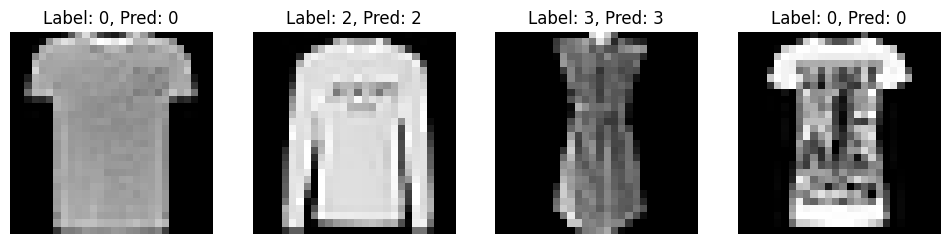

Epoch [5/6], Step [100/938], Loss: 0.0619


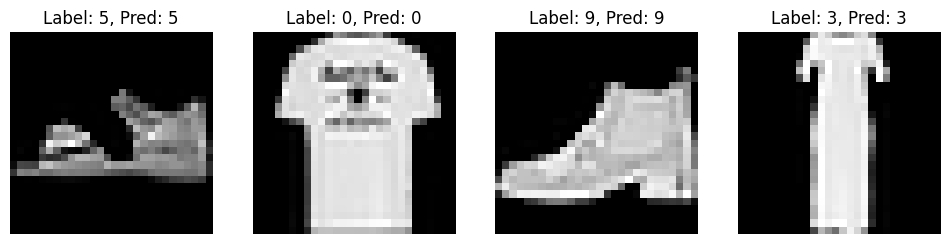

Epoch [5/6], Step [200/938], Loss: 0.0418


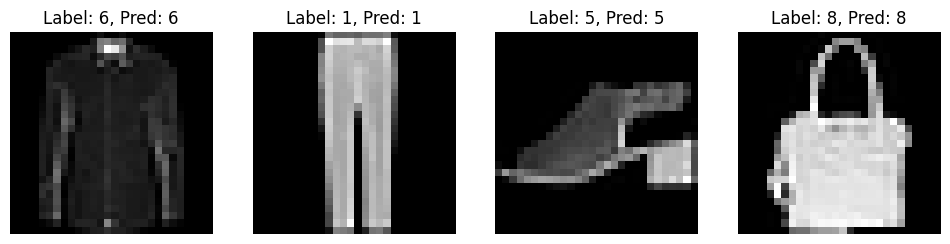

Epoch [5/6], Step [300/938], Loss: 0.1187


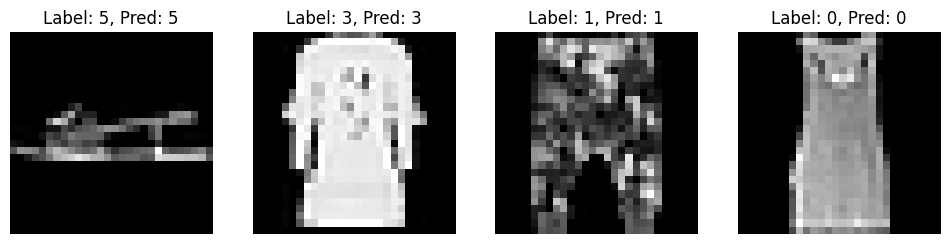

Epoch [5/6], Step [400/938], Loss: 0.1157


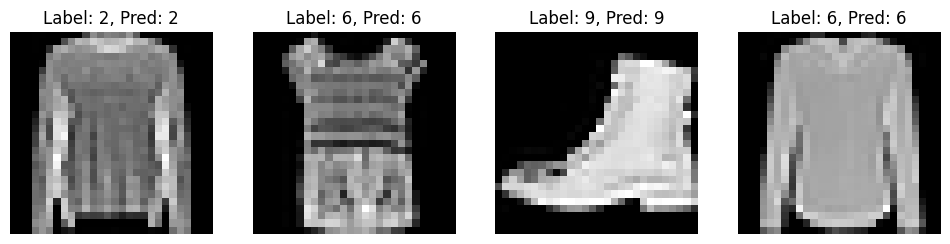

Epoch [5/6], Step [500/938], Loss: 0.0632


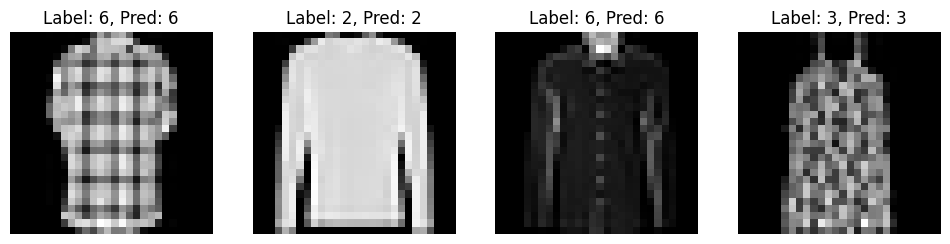

Epoch [5/6], Step [600/938], Loss: 0.0588


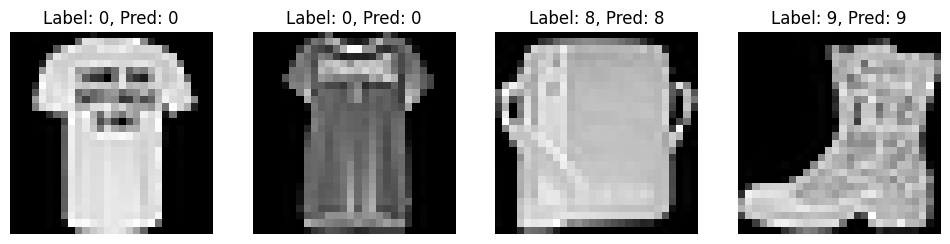

Epoch [5/6], Step [700/938], Loss: 0.0575


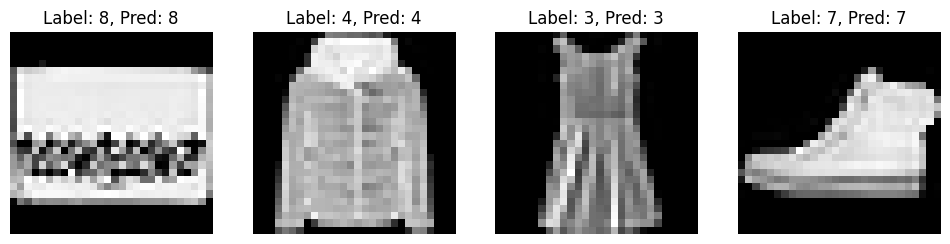

Epoch [5/6], Step [800/938], Loss: 0.0046


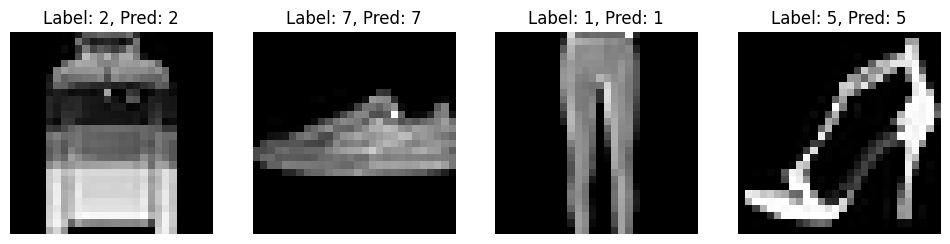

Epoch [5/6], Step [900/938], Loss: 0.1355


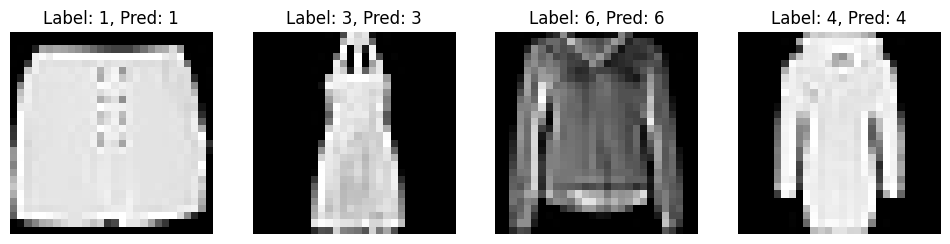

Epoch [6/6], Step [100/938], Loss: 0.0571


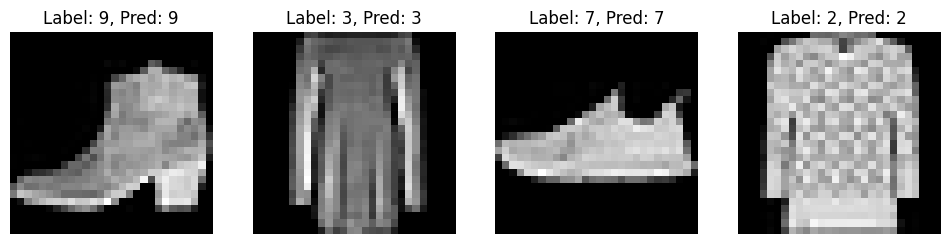

Epoch [6/6], Step [200/938], Loss: 0.0261


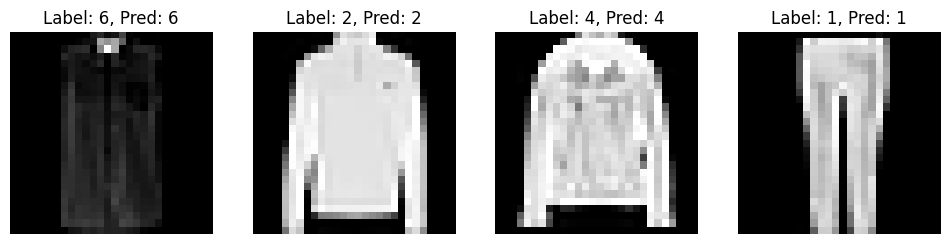

Epoch [6/6], Step [300/938], Loss: 0.0523


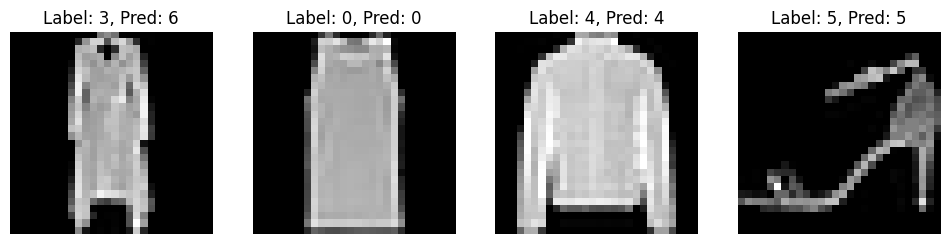

Epoch [6/6], Step [400/938], Loss: 0.1286


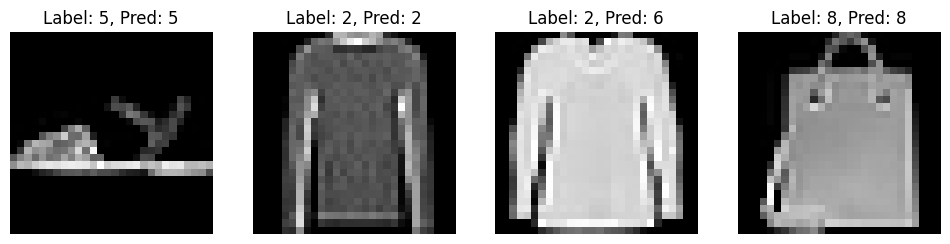

Epoch [6/6], Step [500/938], Loss: 0.0335


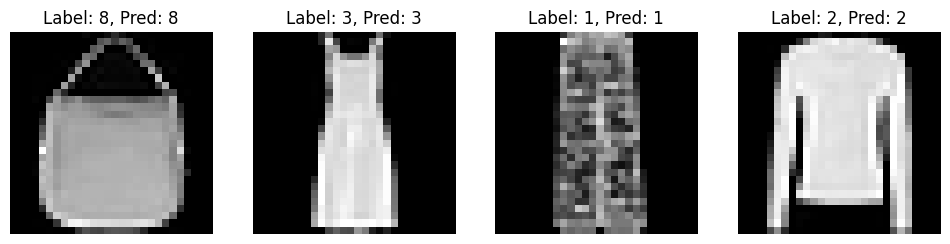

Epoch [6/6], Step [600/938], Loss: 0.0207


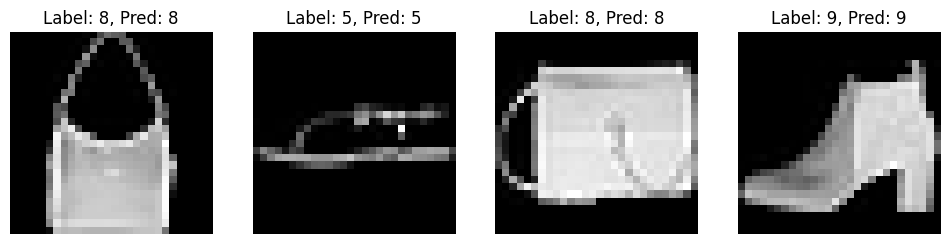

Epoch [6/6], Step [700/938], Loss: 0.2109


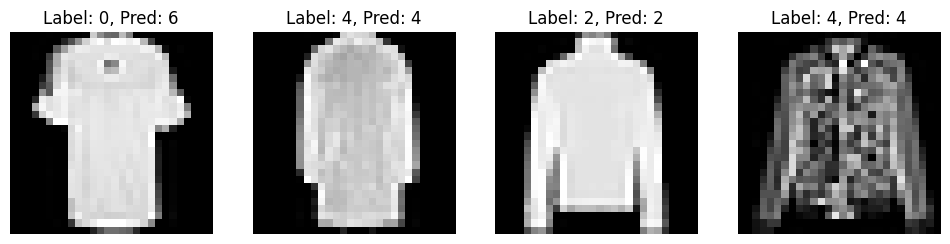

Epoch [6/6], Step [800/938], Loss: 0.0953


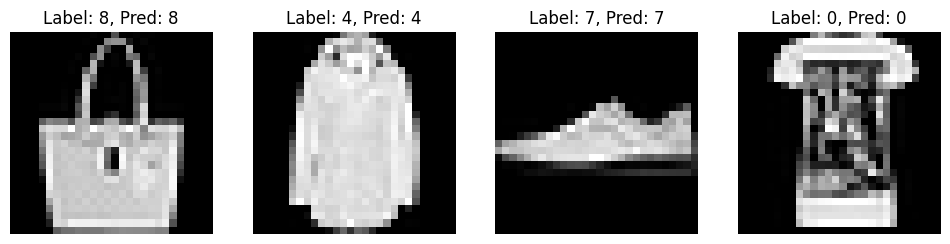

Epoch [6/6], Step [900/938], Loss: 0.1761


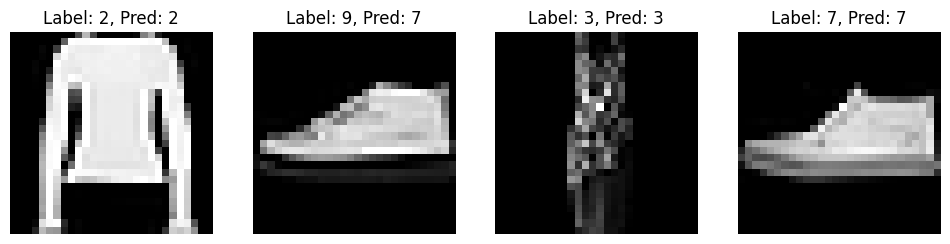

Test Accuracy: 92.02%


In [ ]:
# Training loop
num_epochs = 6
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

            # Visualize some images
            sample_images = images[:4]  # Adjust the number of images to display
            sample_labels = labels[:4]
            sample_outputs = model(sample_images)

            plt.figure(figsize=(12, 3))
            for idx in range(sample_images.size(0)):
                plt.subplot(1, 4, idx + 1)
                img = sample_images[idx].numpy().squeeze()
                plt.imshow(img, cmap='gray')
                plt.title(f'Label: {sample_labels[idx]}, Pred: {torch.argmax(sample_outputs[idx])}')
                plt.axis('off')
            plt.show()

# Test the model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch [1/8], Step [100/938], Loss: 0.0465


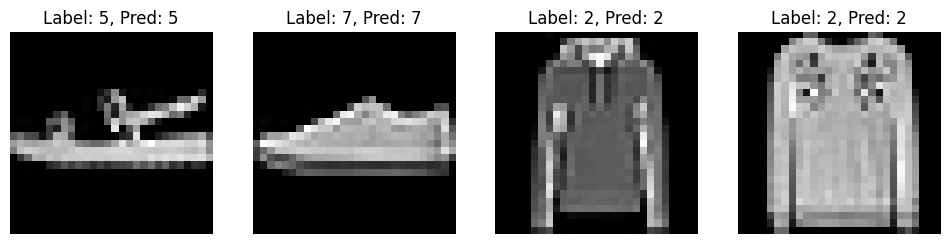

Epoch [1/8], Step [200/938], Loss: 0.0929


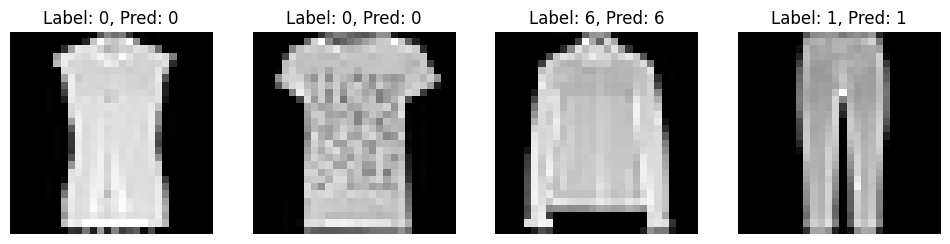

Epoch [1/8], Step [300/938], Loss: 0.0957


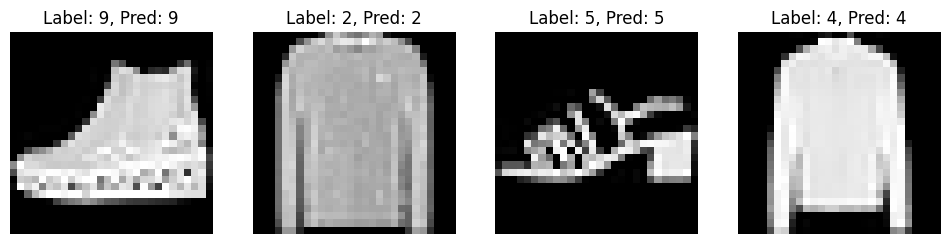

Epoch [1/8], Step [400/938], Loss: 0.0934


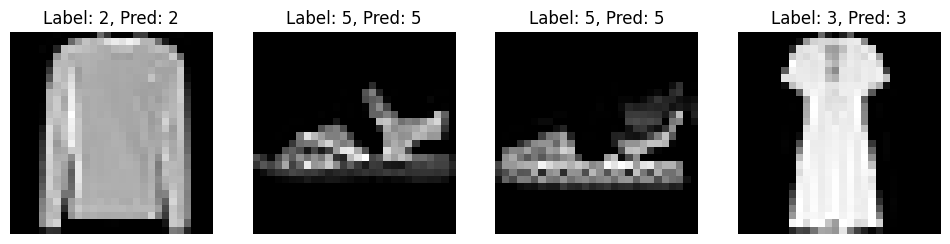

Epoch [1/8], Step [500/938], Loss: 0.0659


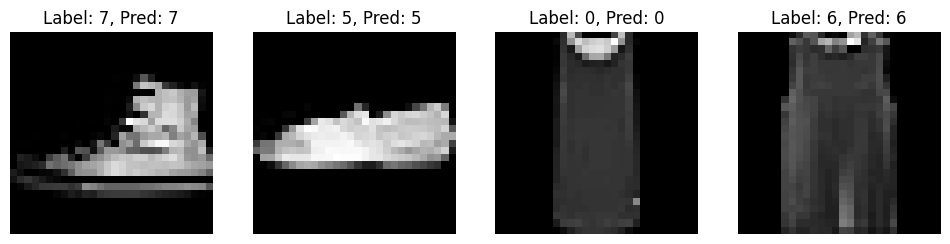

Epoch [1/8], Step [600/938], Loss: 0.0796


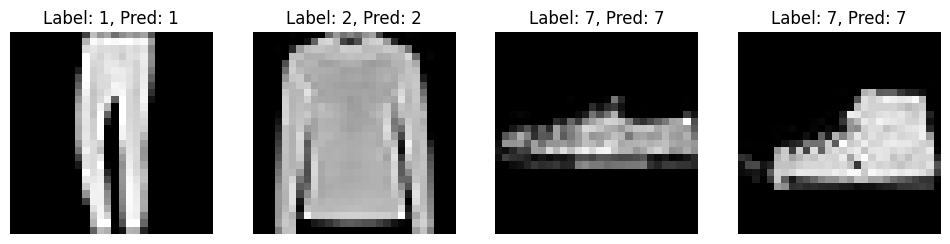

Epoch [1/8], Step [700/938], Loss: 0.0628


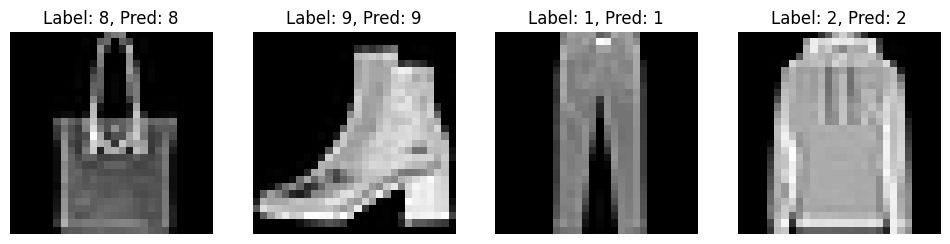

Epoch [1/8], Step [800/938], Loss: 0.0306


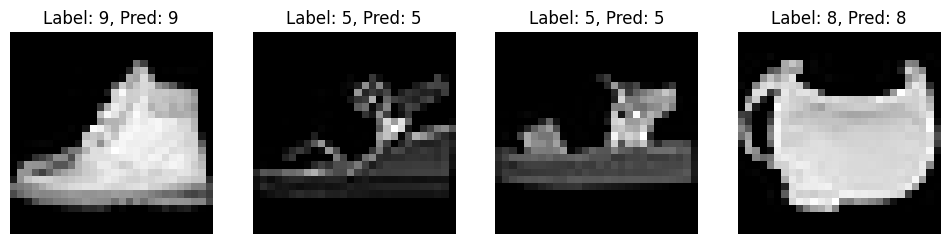

Epoch [1/8], Step [900/938], Loss: 0.0733


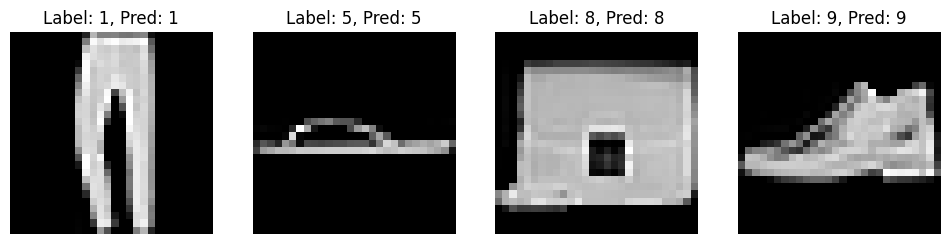

Epoch [2/8], Step [100/938], Loss: 0.0470


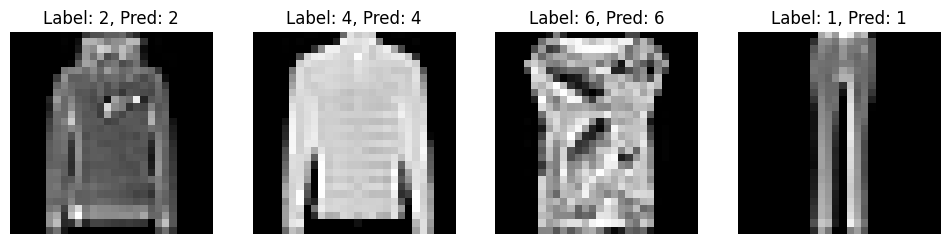

Epoch [2/8], Step [200/938], Loss: 0.0274


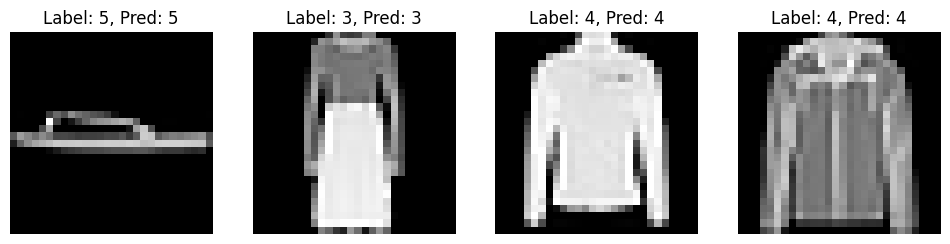

Epoch [2/8], Step [300/938], Loss: 0.0349


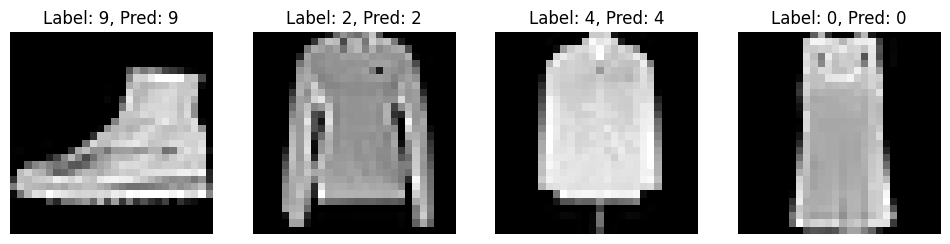

Epoch [2/8], Step [400/938], Loss: 0.0150


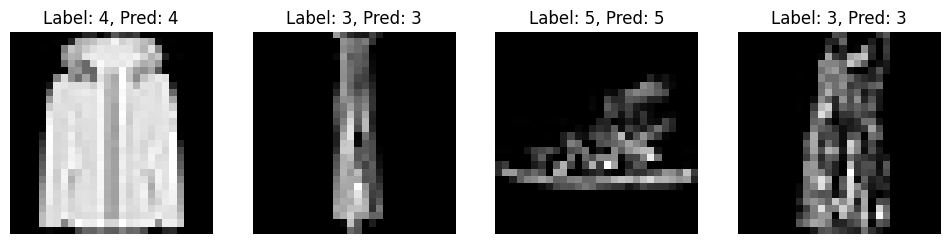

Epoch [2/8], Step [500/938], Loss: 0.0574


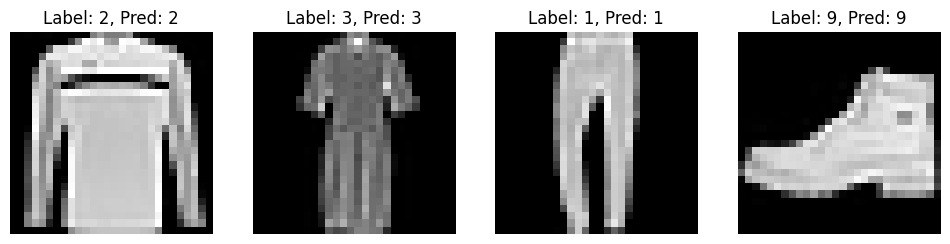

Epoch [2/8], Step [600/938], Loss: 0.0175


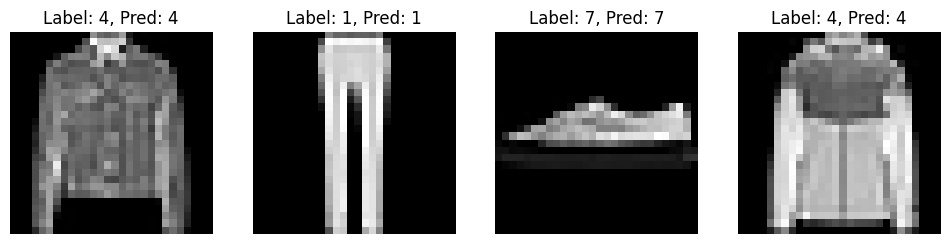

Epoch [2/8], Step [700/938], Loss: 0.0553


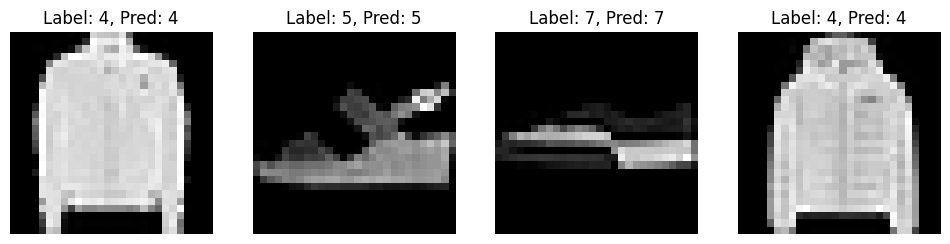

Epoch [2/8], Step [800/938], Loss: 0.0576


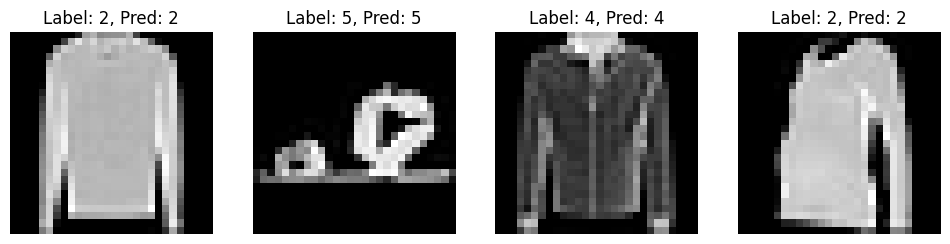

Epoch [2/8], Step [900/938], Loss: 0.0879


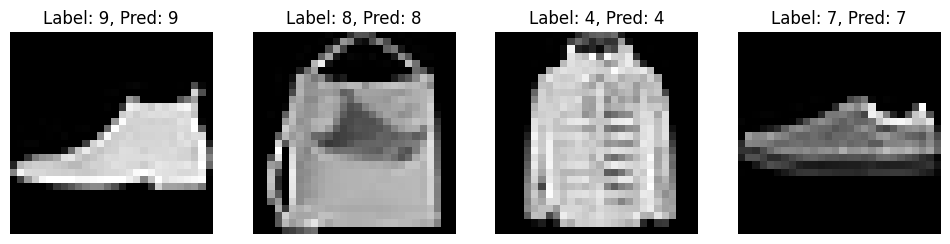

Epoch [3/8], Step [100/938], Loss: 0.0211


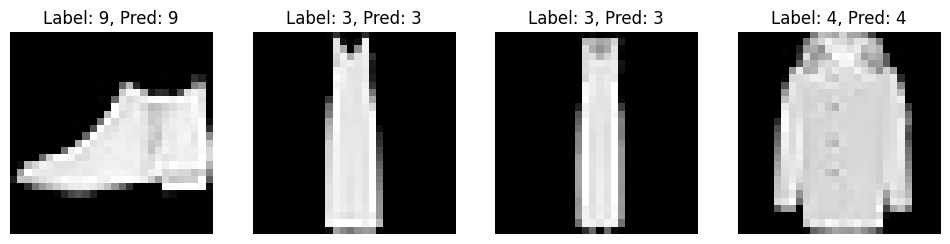

Epoch [3/8], Step [200/938], Loss: 0.0813


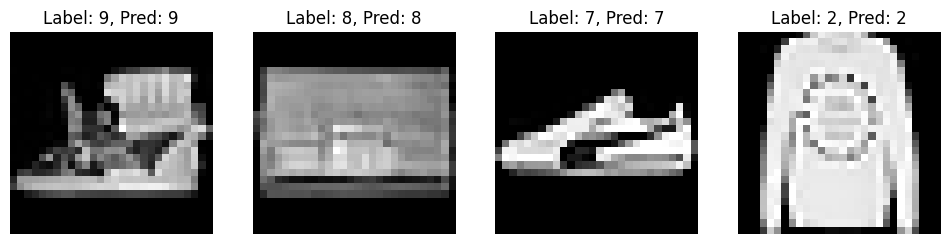

Epoch [3/8], Step [300/938], Loss: 0.0129


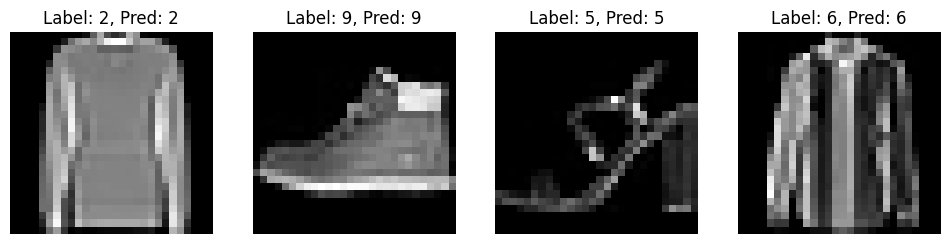

Epoch [3/8], Step [400/938], Loss: 0.0566


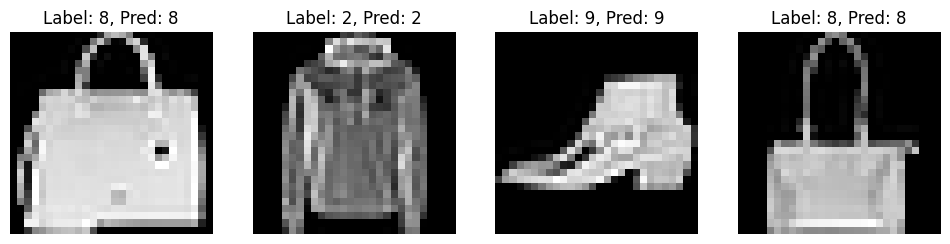

Epoch [3/8], Step [500/938], Loss: 0.1274


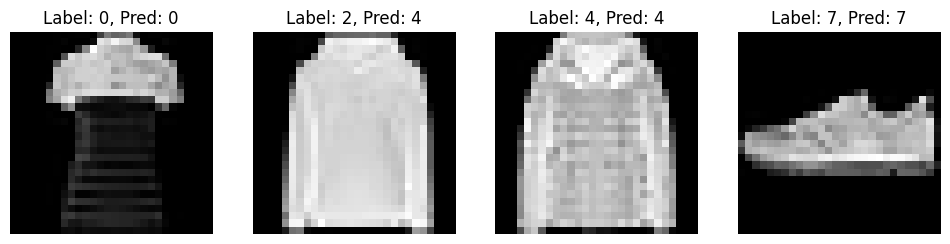

Epoch [3/8], Step [600/938], Loss: 0.0498


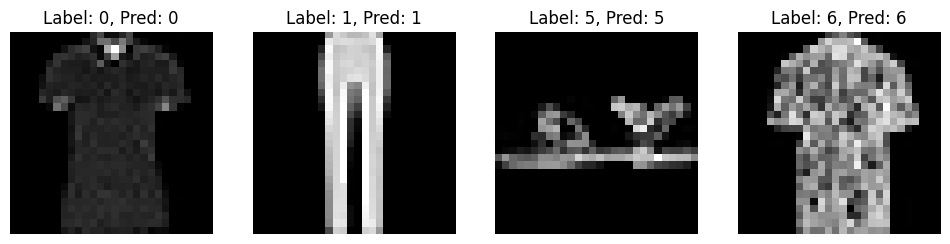

Epoch [3/8], Step [700/938], Loss: 0.1011


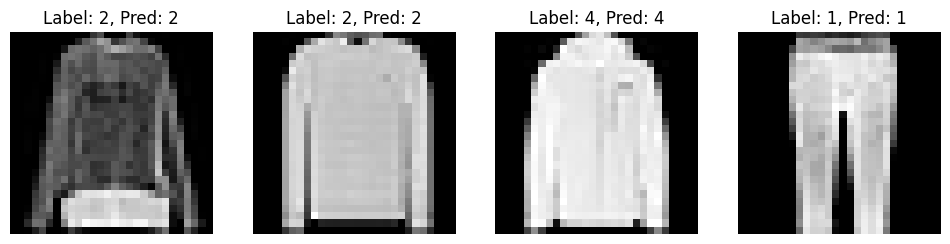

Epoch [3/8], Step [800/938], Loss: 0.0359


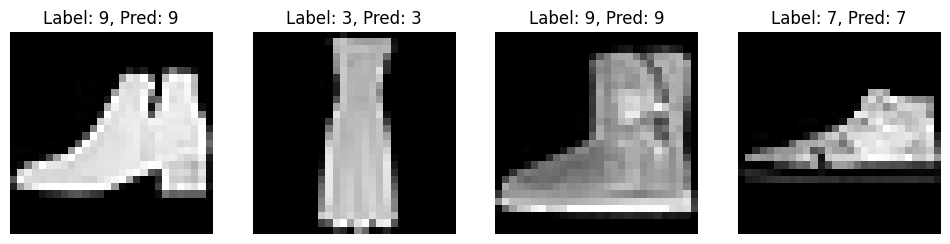

Epoch [3/8], Step [900/938], Loss: 0.0281


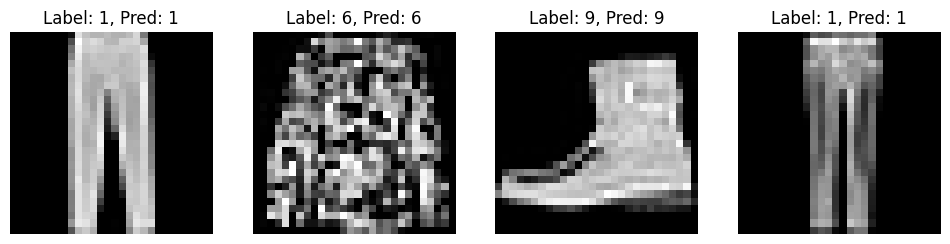

Epoch [4/8], Step [100/938], Loss: 0.0379


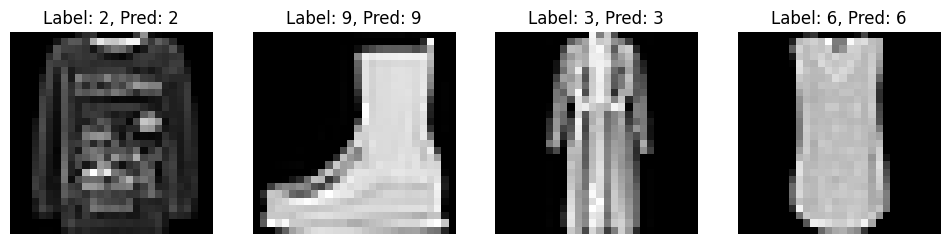

Epoch [4/8], Step [200/938], Loss: 0.0284


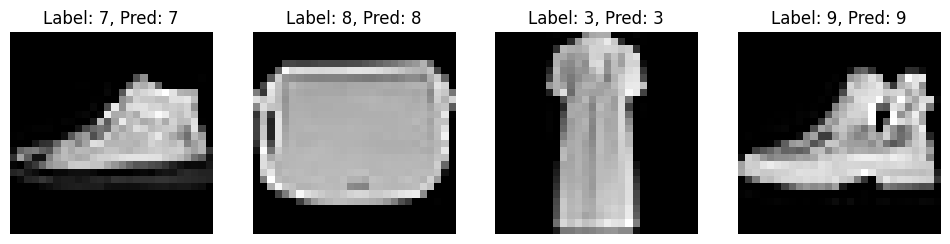

Epoch [4/8], Step [300/938], Loss: 0.0120


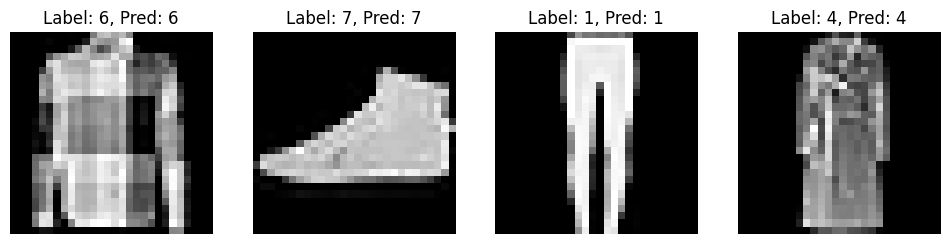

Epoch [4/8], Step [400/938], Loss: 0.0295


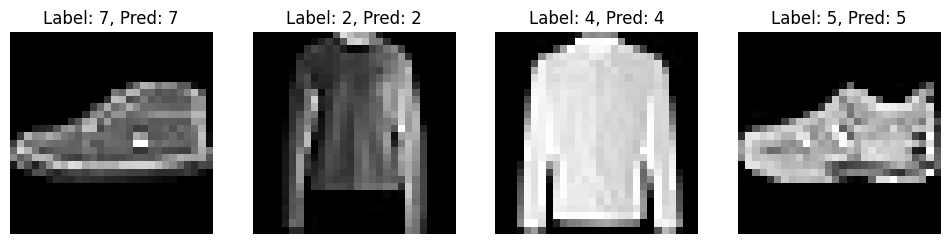

Epoch [4/8], Step [500/938], Loss: 0.0395


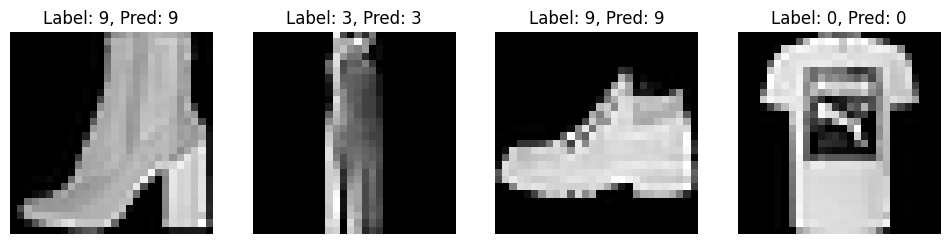

Epoch [4/8], Step [600/938], Loss: 0.0128


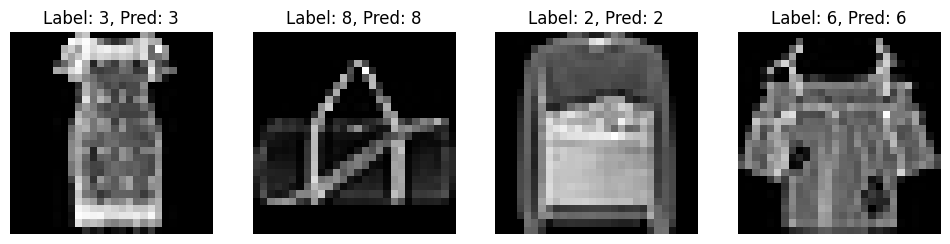

Epoch [4/8], Step [700/938], Loss: 0.1149


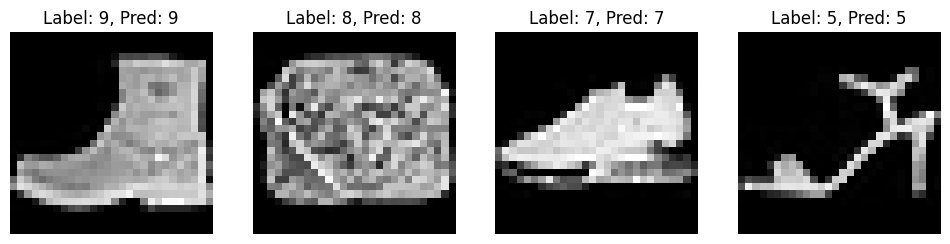

Epoch [4/8], Step [800/938], Loss: 0.0607


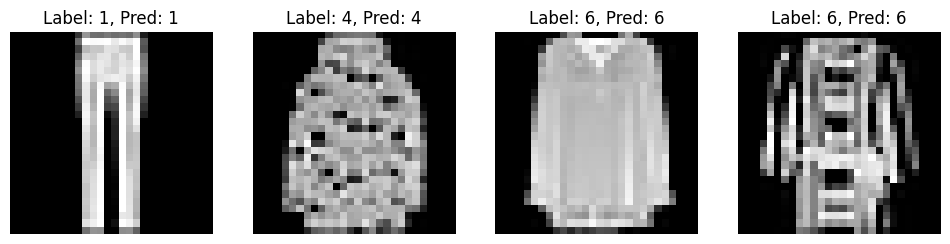

Epoch [4/8], Step [900/938], Loss: 0.0283


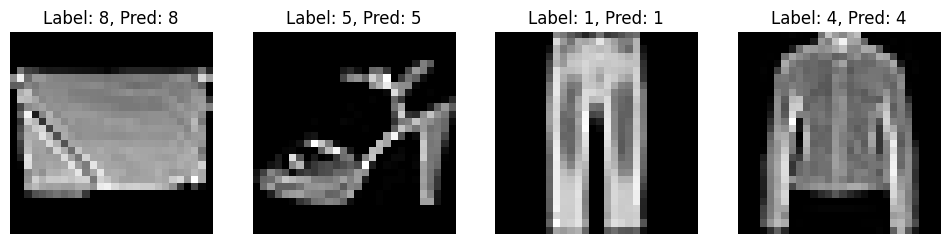

Epoch [5/8], Step [100/938], Loss: 0.1189


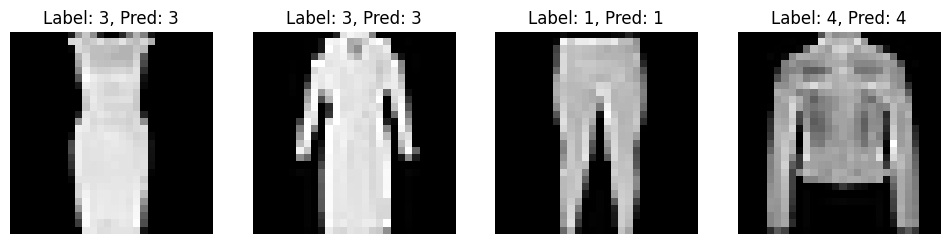

Epoch [5/8], Step [200/938], Loss: 0.0334


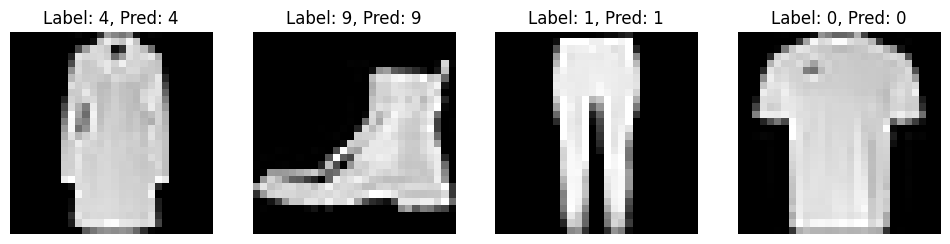

Epoch [5/8], Step [300/938], Loss: 0.0149


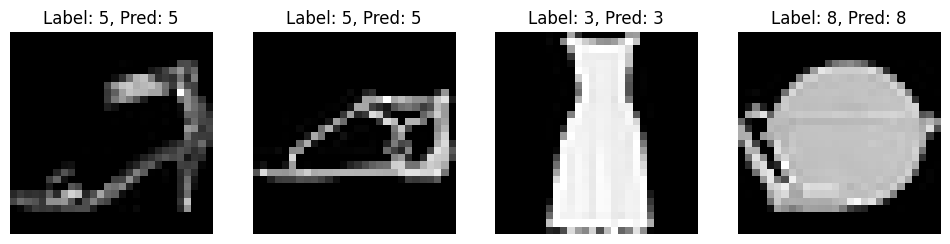

Epoch [5/8], Step [400/938], Loss: 0.0411


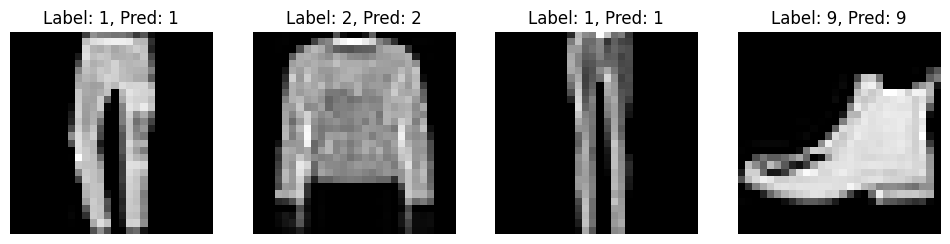

Epoch [5/8], Step [500/938], Loss: 0.0392


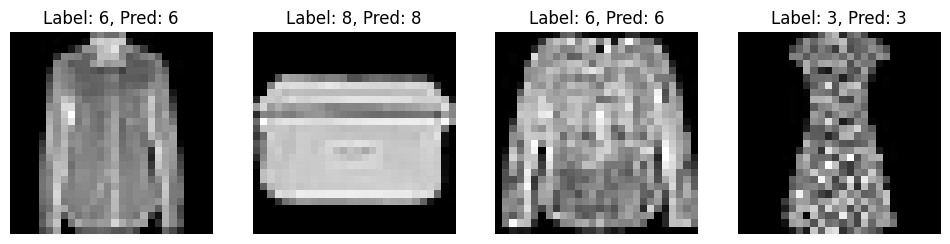

Epoch [5/8], Step [600/938], Loss: 0.0757


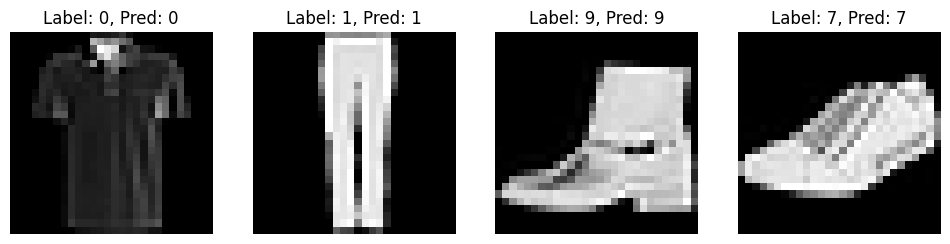

Epoch [5/8], Step [700/938], Loss: 0.0722


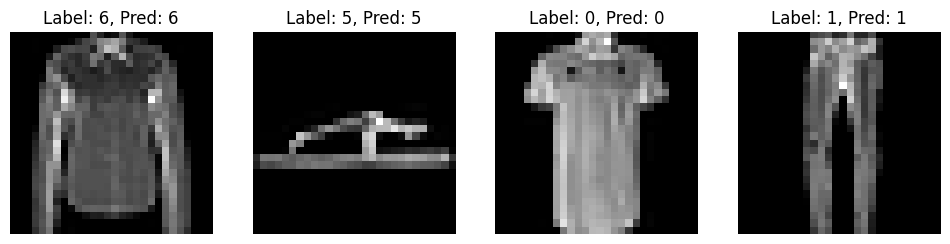

Epoch [5/8], Step [800/938], Loss: 0.0898


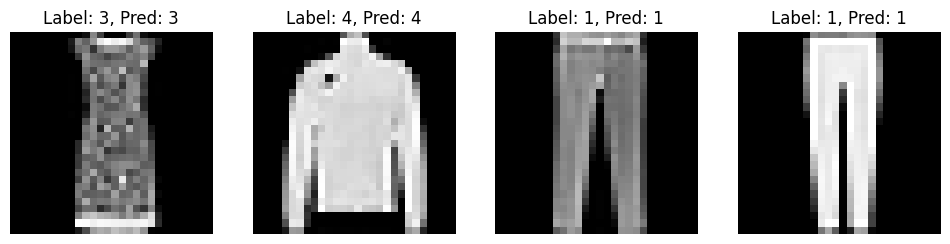

Epoch [5/8], Step [900/938], Loss: 0.0048


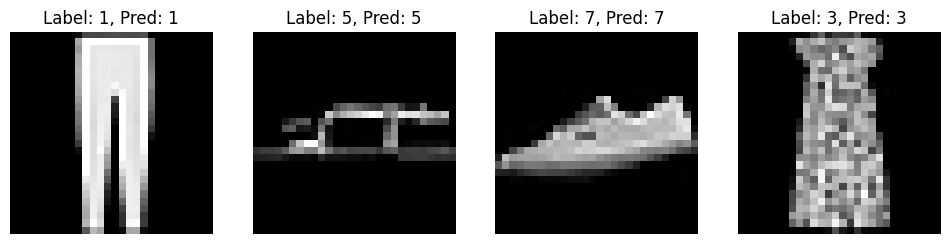

Epoch [6/8], Step [100/938], Loss: 0.0094


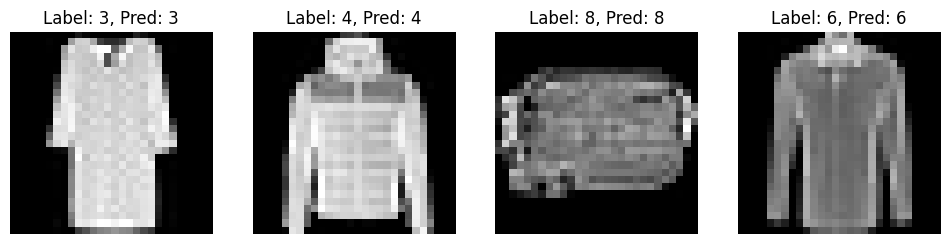

Epoch [6/8], Step [200/938], Loss: 0.0056


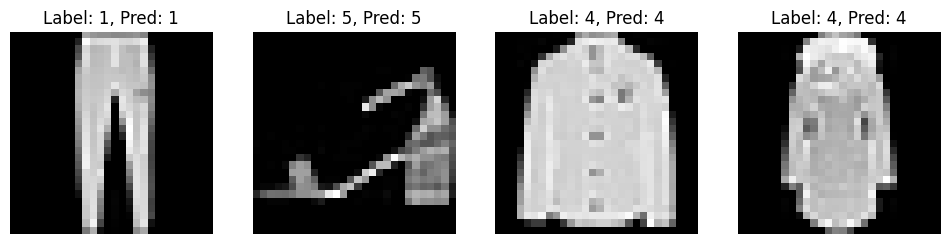

Epoch [6/8], Step [300/938], Loss: 0.0200


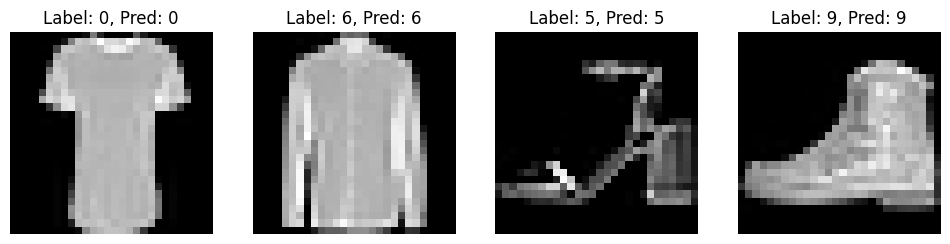

Epoch [6/8], Step [400/938], Loss: 0.0103


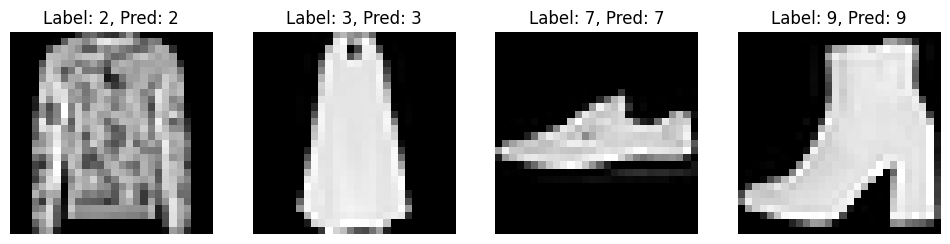

Epoch [6/8], Step [500/938], Loss: 0.0112


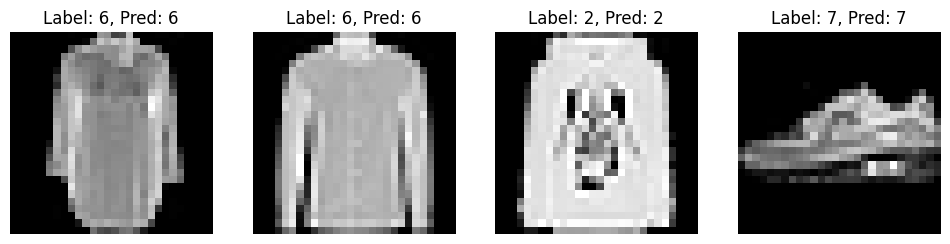

Epoch [6/8], Step [600/938], Loss: 0.0788


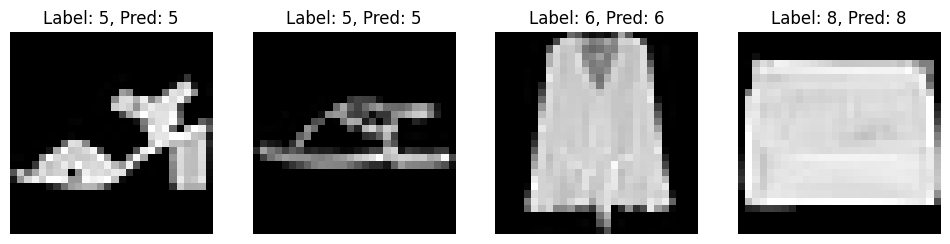

Epoch [6/8], Step [700/938], Loss: 0.0120


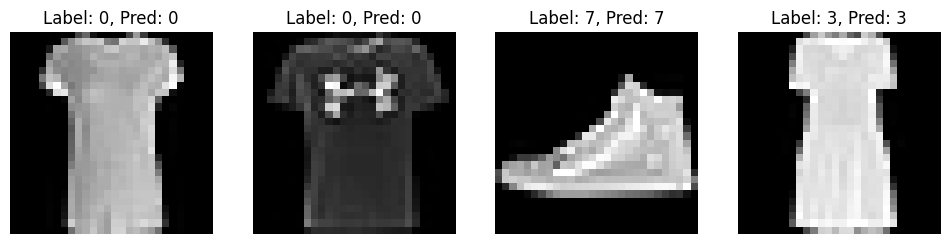

Epoch [6/8], Step [800/938], Loss: 0.0594


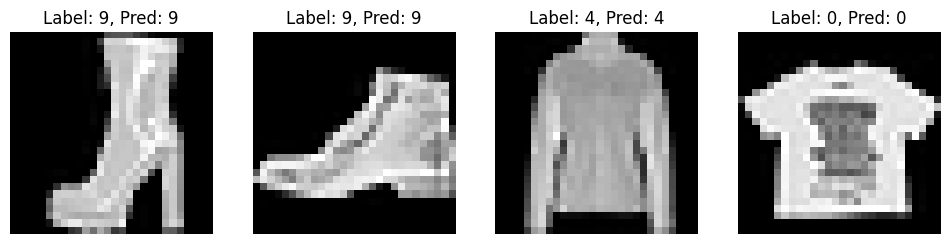

Epoch [6/8], Step [900/938], Loss: 0.0455


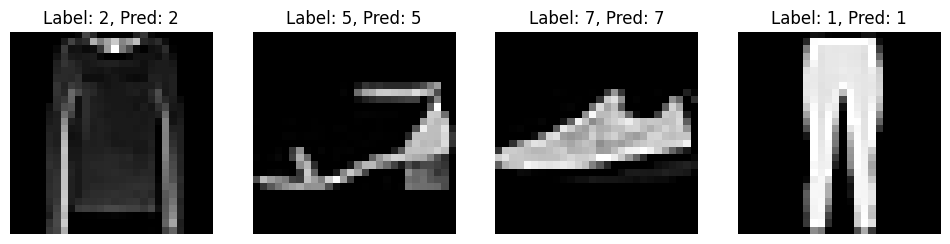

Epoch [7/8], Step [100/938], Loss: 0.0492


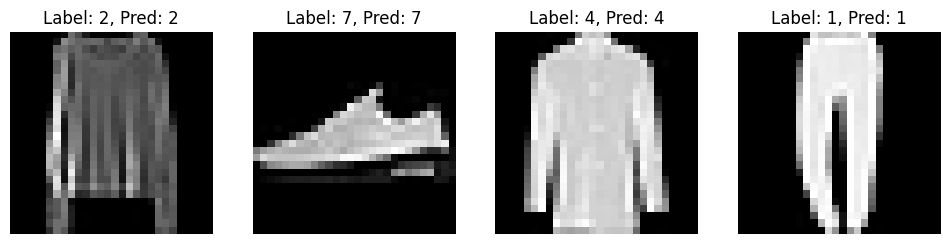

Epoch [7/8], Step [200/938], Loss: 0.0154


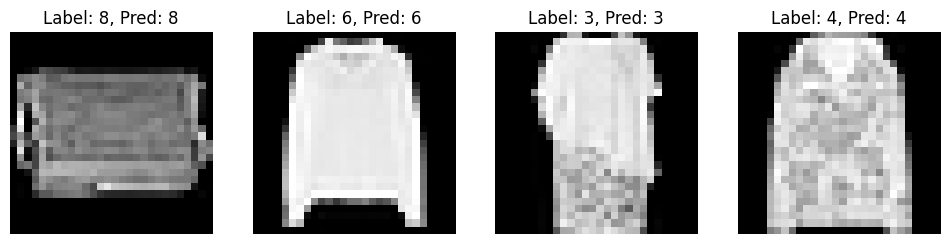

Epoch [7/8], Step [300/938], Loss: 0.0170


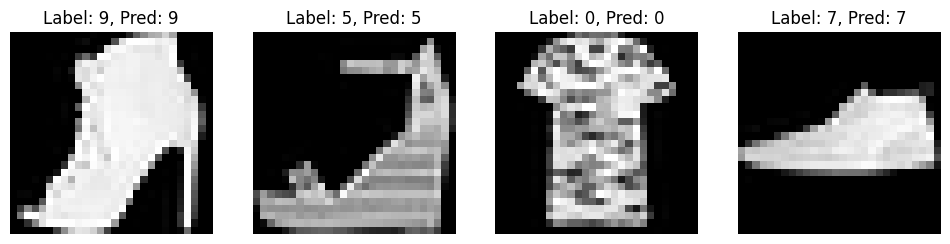

Epoch [7/8], Step [400/938], Loss: 0.0065


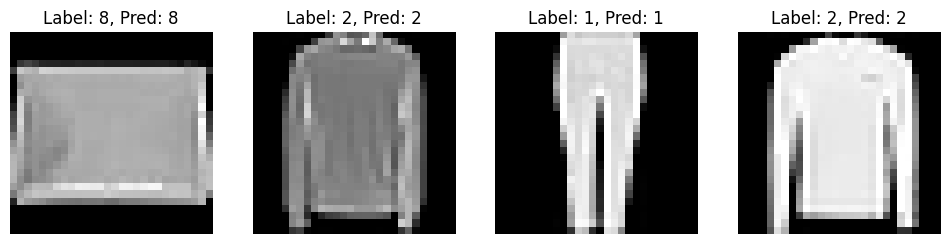

Epoch [7/8], Step [500/938], Loss: 0.0349


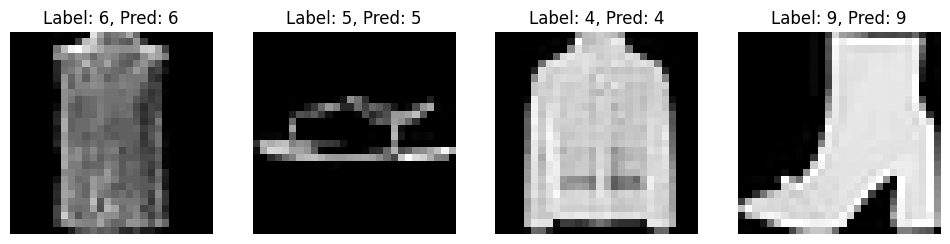

Epoch [7/8], Step [600/938], Loss: 0.0300


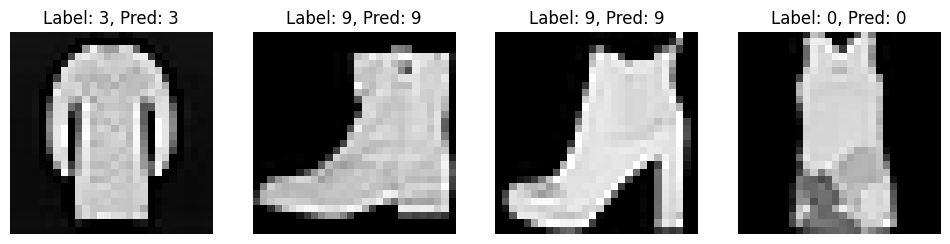

Epoch [7/8], Step [700/938], Loss: 0.0047


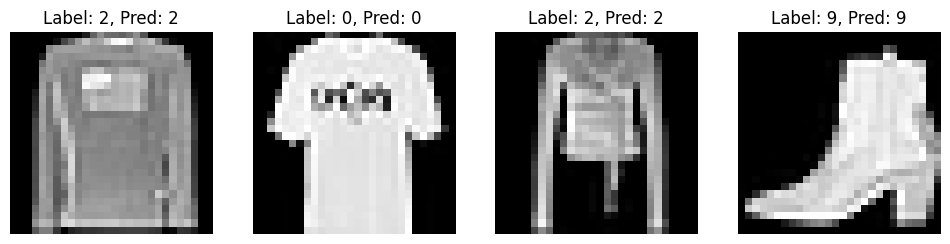

Epoch [7/8], Step [800/938], Loss: 0.0118


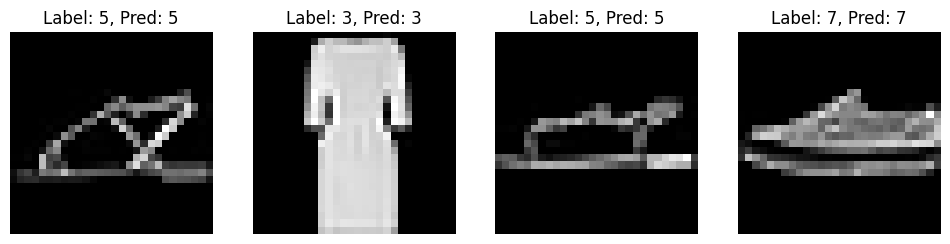

Epoch [7/8], Step [900/938], Loss: 0.0642


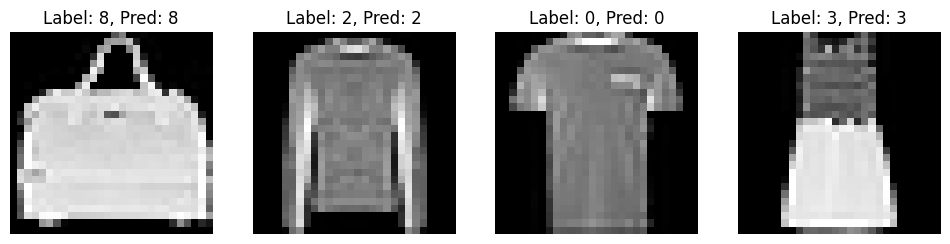

Epoch [8/8], Step [100/938], Loss: 0.0512


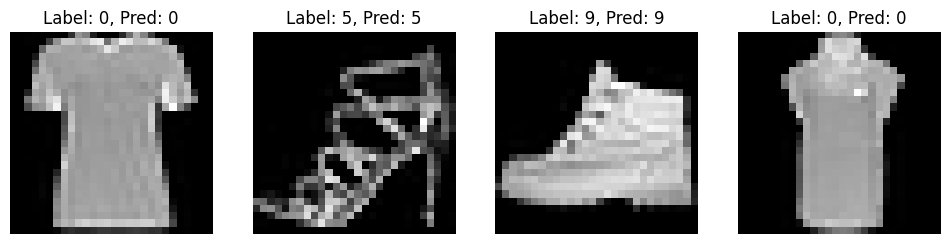

Epoch [8/8], Step [200/938], Loss: 0.0094


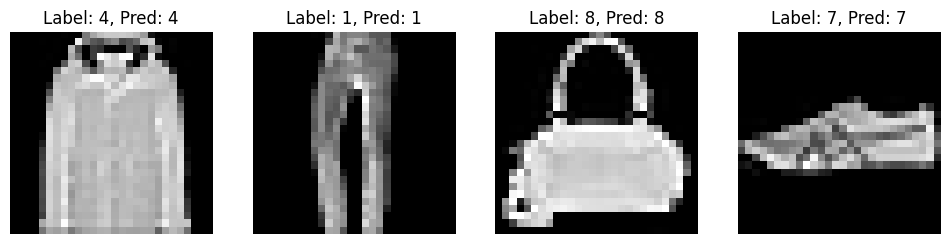

Epoch [8/8], Step [300/938], Loss: 0.0069


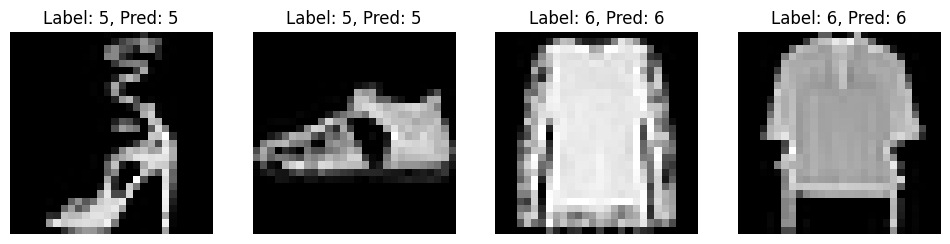

Epoch [8/8], Step [400/938], Loss: 0.0317


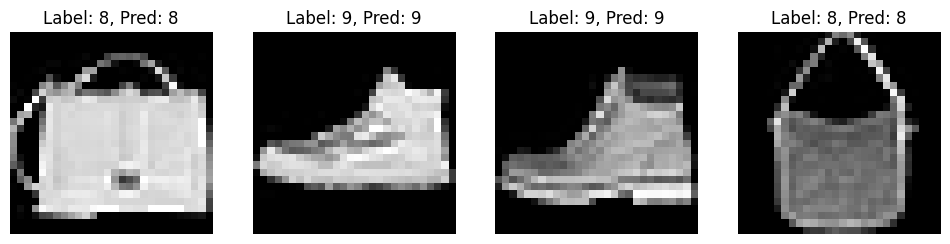

Epoch [8/8], Step [500/938], Loss: 0.0177


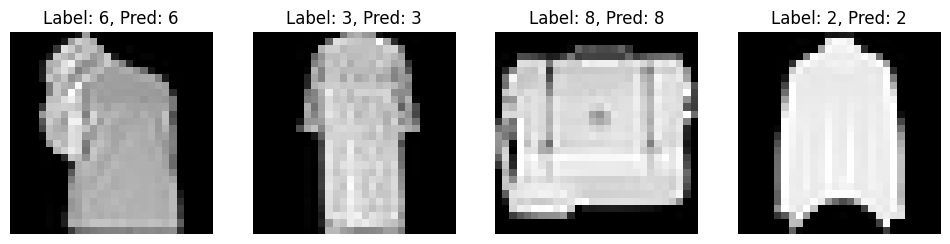

Epoch [8/8], Step [600/938], Loss: 0.0565


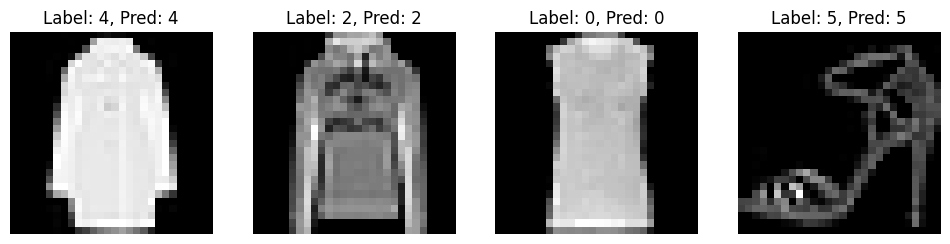

Epoch [8/8], Step [700/938], Loss: 0.0149


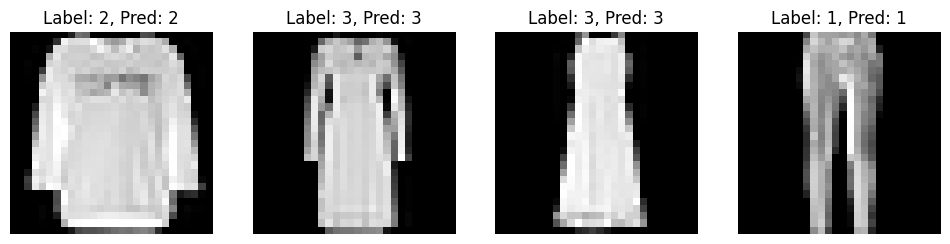

Epoch [8/8], Step [800/938], Loss: 0.0400


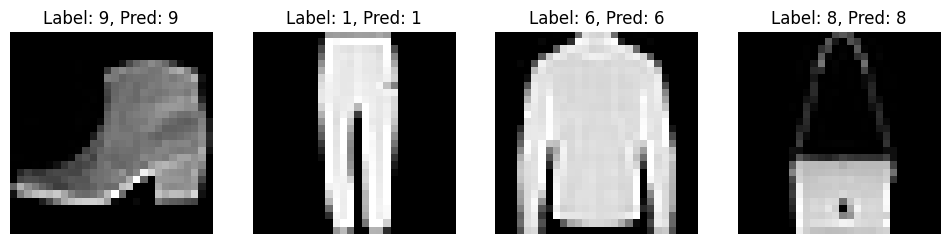

Epoch [8/8], Step [900/938], Loss: 0.0299


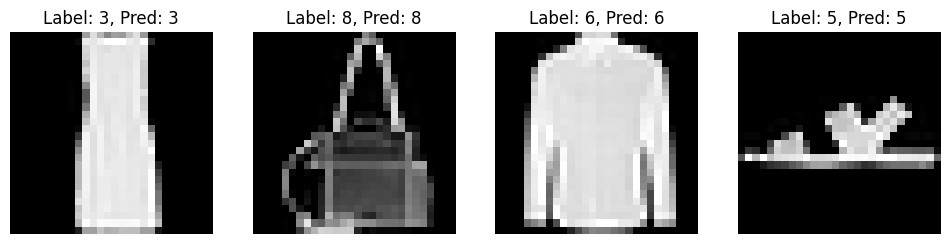

Test Accuracy: 91.78%


In [ ]:
# Training loop
num_epochs = 8
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

            # Visualize some images
            sample_images = images[:4]  # Adjust the number of images to display
            sample_labels = labels[:4]
            sample_outputs = model(sample_images)

            plt.figure(figsize=(12, 3))
            for idx in range(sample_images.size(0)):
                plt.subplot(1, 4, idx + 1)
                img = sample_images[idx].numpy().squeeze()
                plt.imshow(img, cmap='gray')
                plt.title(f'Label: {sample_labels[idx]}, Pred: {torch.argmax(sample_outputs[idx])}')
                plt.axis('off')
            plt.show()

# Test the model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch [1/10], Step [100/938], Loss: 0.0609


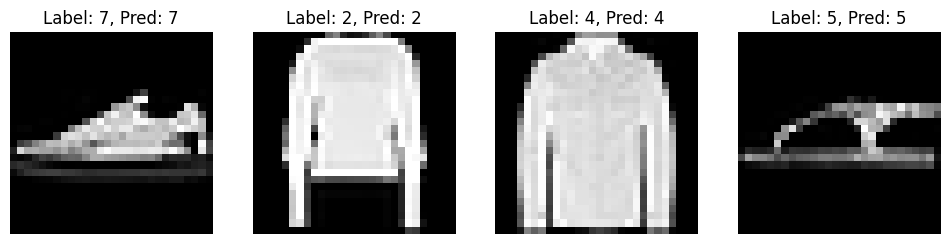

Epoch [1/10], Step [200/938], Loss: 0.0203


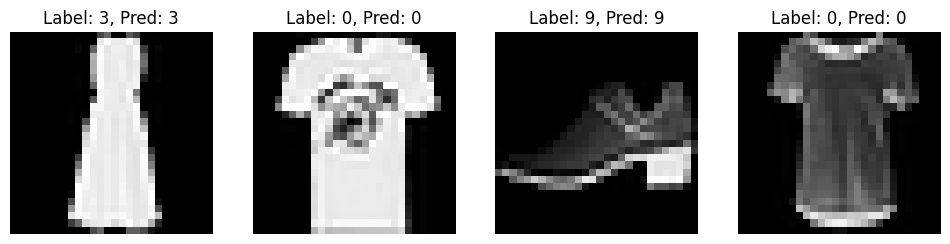

Epoch [1/10], Step [300/938], Loss: 0.0745


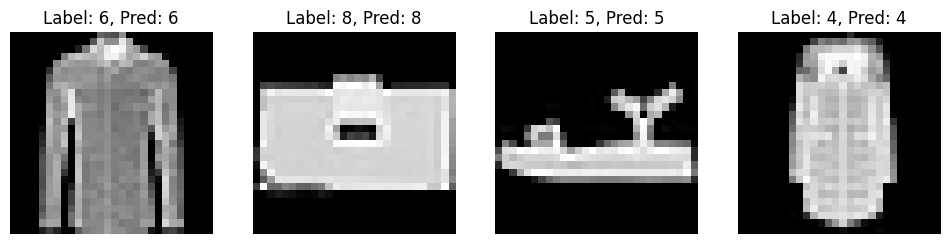

Epoch [1/10], Step [400/938], Loss: 0.0313


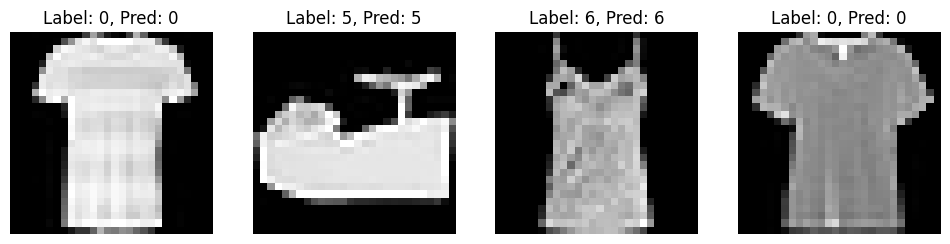

Epoch [1/10], Step [500/938], Loss: 0.0260


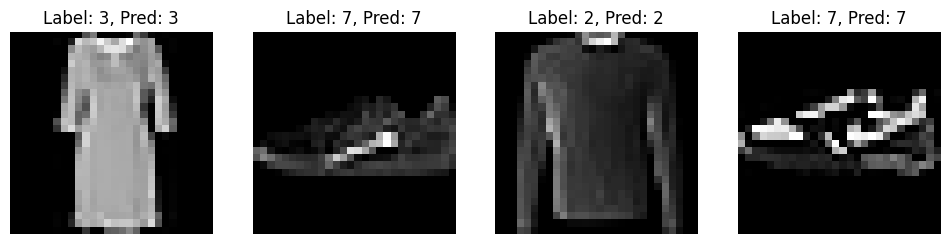

Epoch [1/10], Step [600/938], Loss: 0.0501


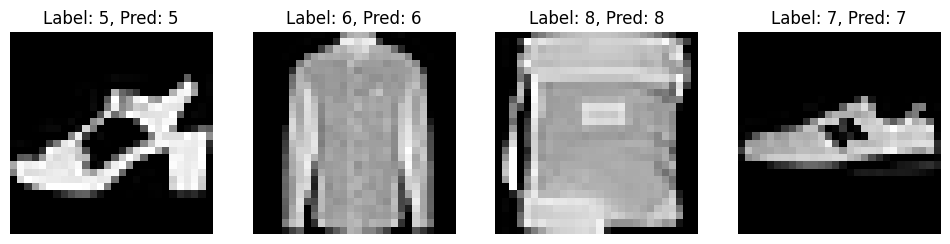

Epoch [1/10], Step [700/938], Loss: 0.0476


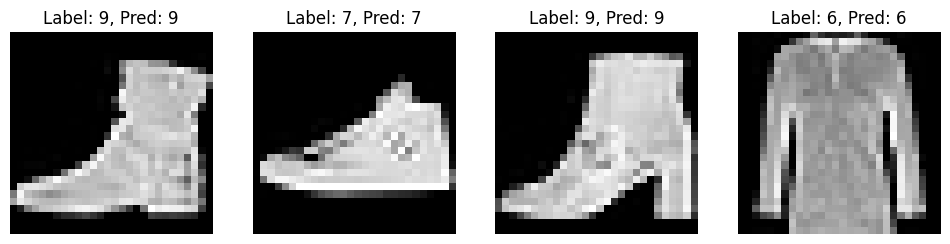

Epoch [1/10], Step [800/938], Loss: 0.0570


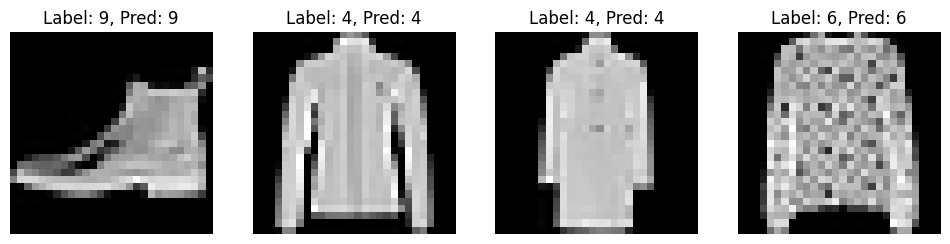

Epoch [1/10], Step [900/938], Loss: 0.0229


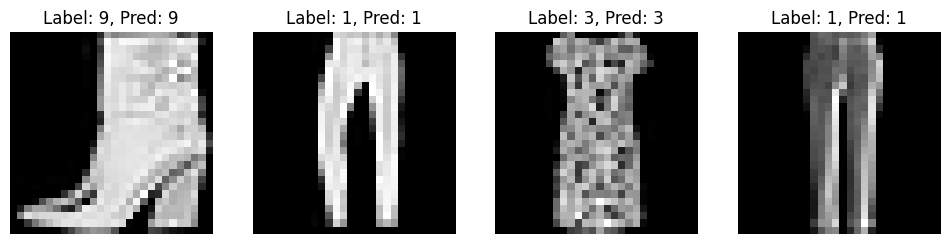

Epoch [2/10], Step [100/938], Loss: 0.0099


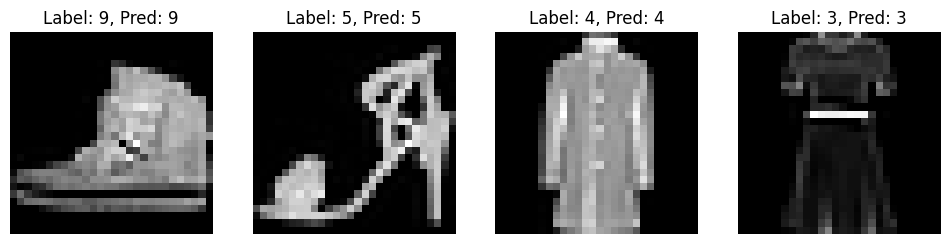

Epoch [2/10], Step [200/938], Loss: 0.0011


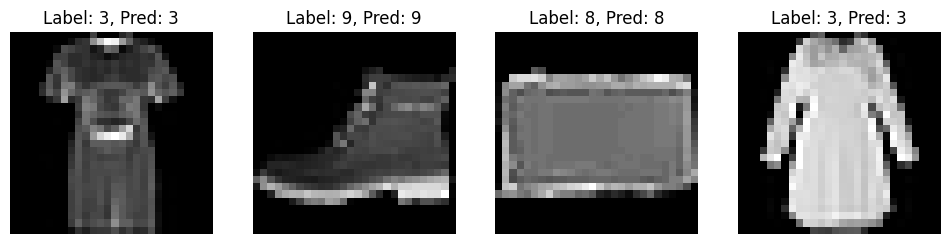

Epoch [2/10], Step [300/938], Loss: 0.0417


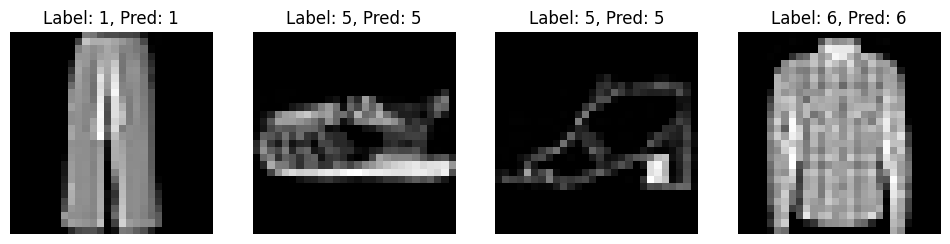

Epoch [2/10], Step [400/938], Loss: 0.1028


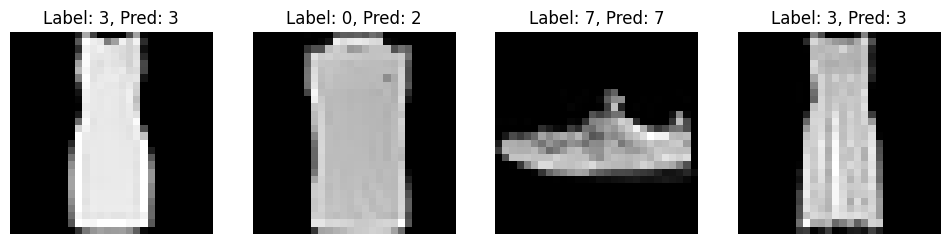

Epoch [2/10], Step [500/938], Loss: 0.0294


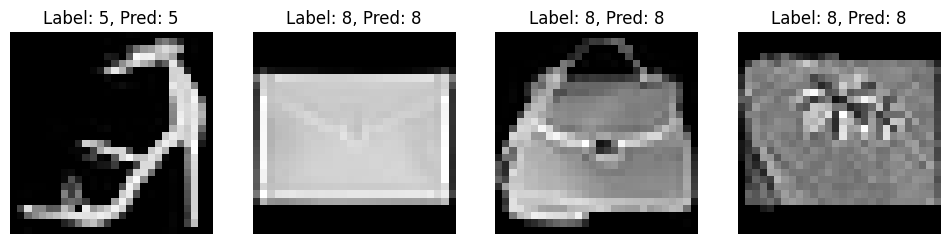

Epoch [2/10], Step [600/938], Loss: 0.0308


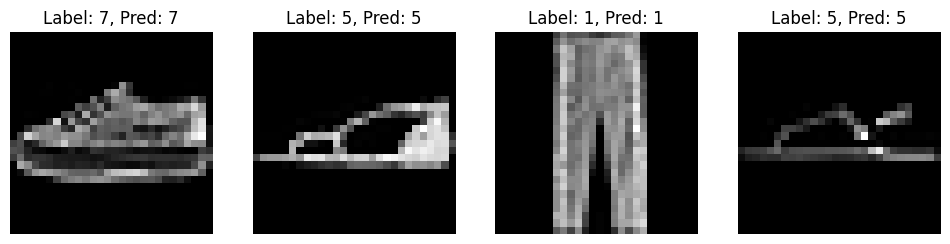

Epoch [2/10], Step [700/938], Loss: 0.0068


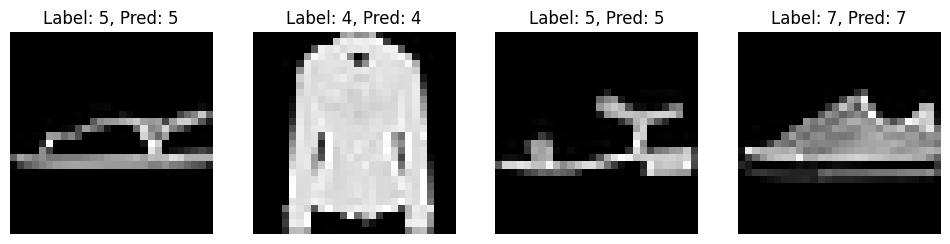

Epoch [2/10], Step [800/938], Loss: 0.0102


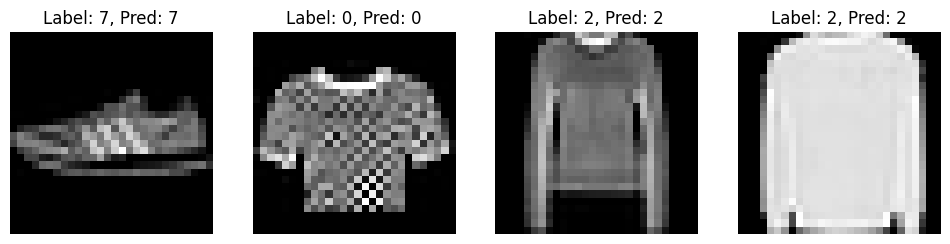

Epoch [2/10], Step [900/938], Loss: 0.0336


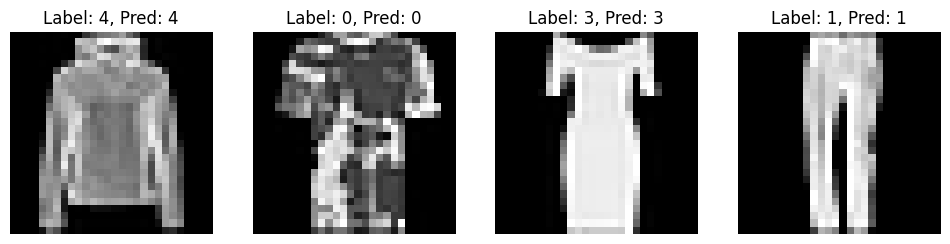

Epoch [3/10], Step [100/938], Loss: 0.0527


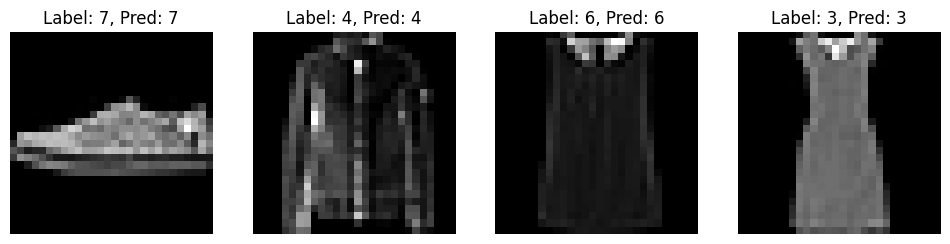

Epoch [3/10], Step [200/938], Loss: 0.0087


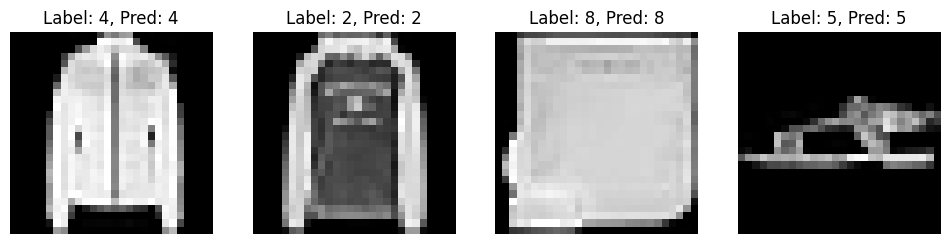

Epoch [3/10], Step [300/938], Loss: 0.0456


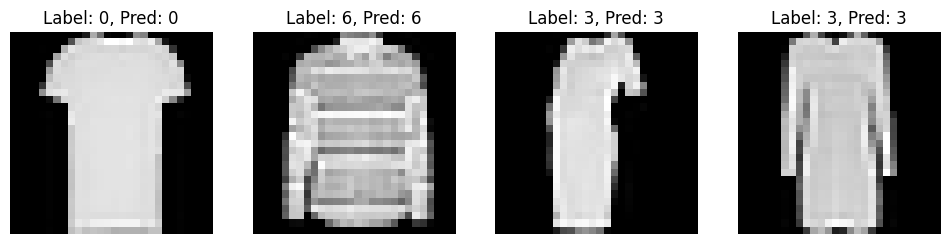

Epoch [3/10], Step [400/938], Loss: 0.0383


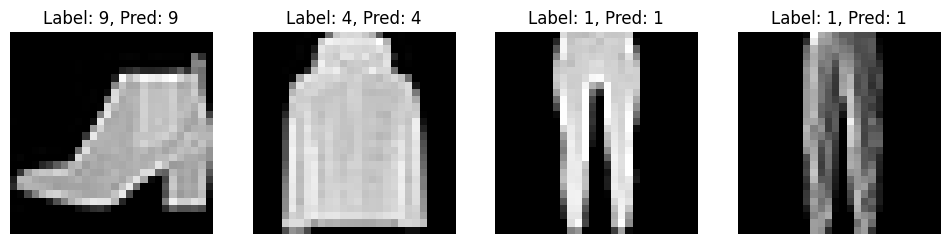

Epoch [3/10], Step [500/938], Loss: 0.1437


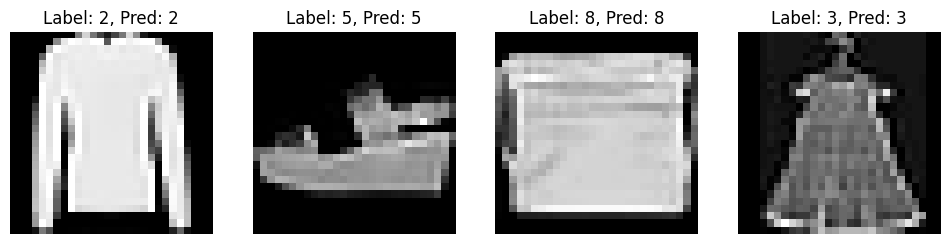

Epoch [3/10], Step [600/938], Loss: 0.1141


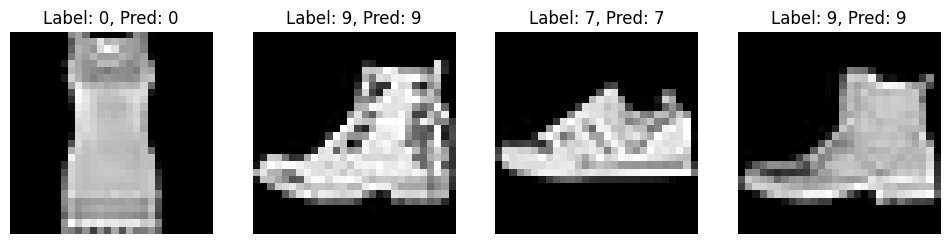

Epoch [3/10], Step [700/938], Loss: 0.0592


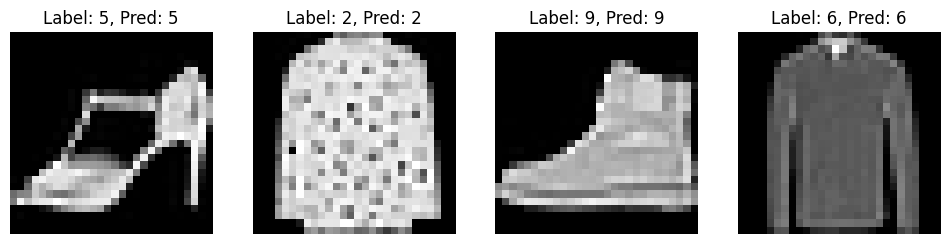

Epoch [3/10], Step [800/938], Loss: 0.0192


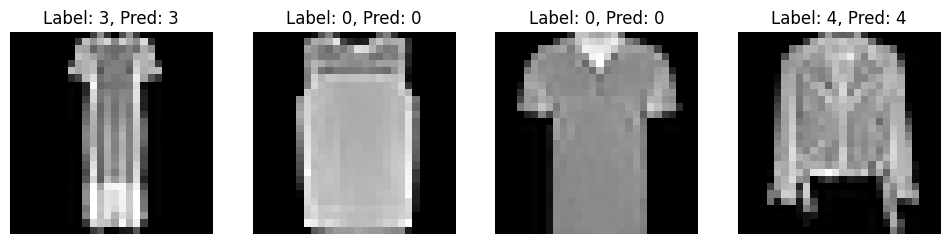

Epoch [3/10], Step [900/938], Loss: 0.0615


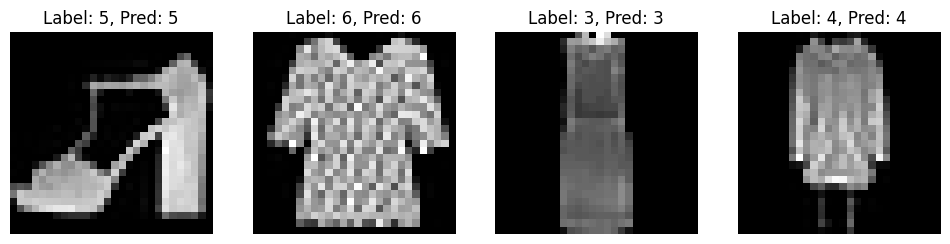

Epoch [4/10], Step [100/938], Loss: 0.0081


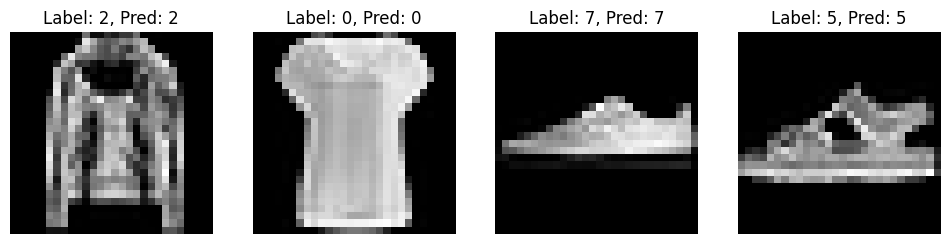

Epoch [4/10], Step [200/938], Loss: 0.0189


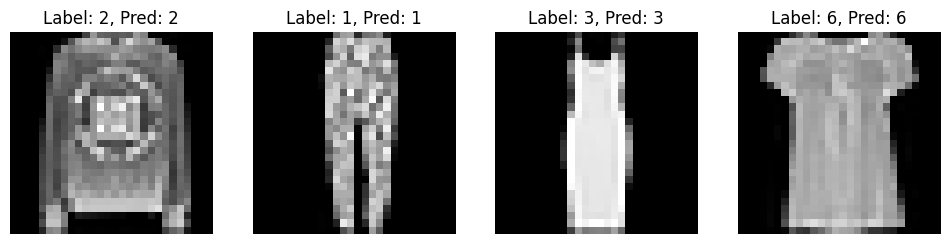

Epoch [4/10], Step [300/938], Loss: 0.0550


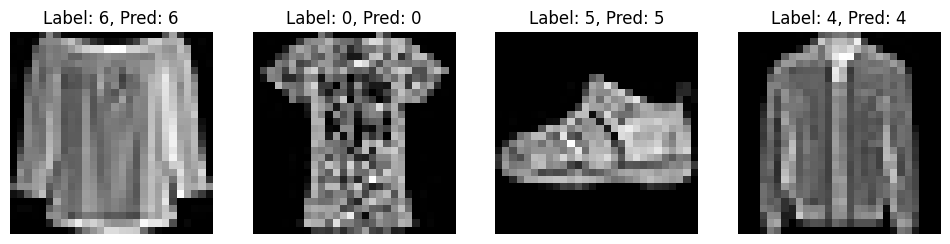

Epoch [4/10], Step [400/938], Loss: 0.0100


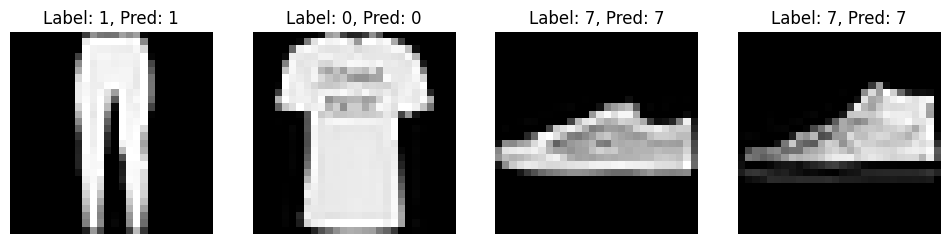

Epoch [4/10], Step [500/938], Loss: 0.0267


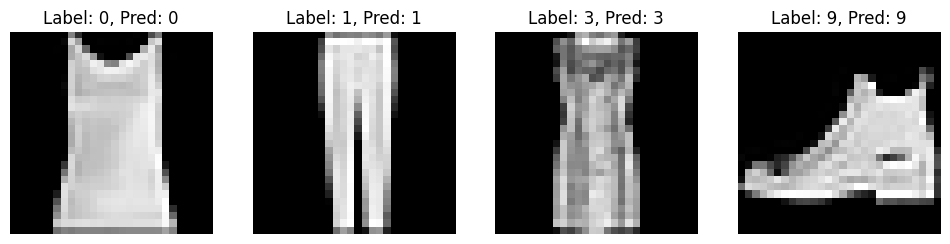

Epoch [4/10], Step [600/938], Loss: 0.0021


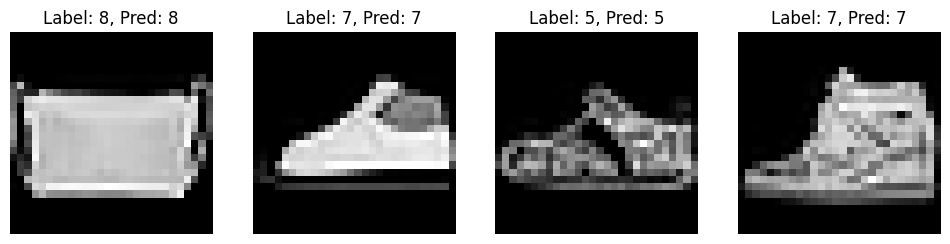

Epoch [4/10], Step [700/938], Loss: 0.0410


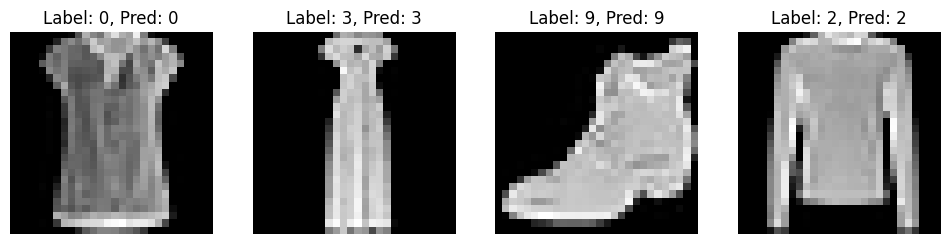

In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

            # Visualize some images
            sample_images = images[:4]  # Adjust the number of images to display
            sample_labels = labels[:4]
            sample_outputs = model(sample_images)

            plt.figure(figsize=(12, 3))
            for idx in range(sample_images.size(0)):
                plt.subplot(1, 4, idx + 1)
                img = sample_images[idx].numpy().squeeze()
                plt.imshow(img, cmap='gray')
                plt.title(f'Label: {sample_labels[idx]}, Pred: {torch.argmax(sample_outputs[idx])}')
                plt.axis('off')
            plt.show()

# Test the model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')
